<a href="https://colab.research.google.com/github/NotChencho/DS-HPE/blob/main/Preprocessing_Marconi_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Study Before Creating Preprocessing Pipeline

### 1.1. Colab or Local Config

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#import os
# Check current working directory
#current_dir = os.getcwd()
#print(current_dir)

In [3]:
# os.chdir('/content/drive/MyDrive/4to/cuatri 1/HPE-proy/') # JV
# dir_path = r"C:\Users\adeli\Documents 4-Q1\Data Project" # local
#dir_path = '/content/drive/MyDrive/Proyecto Datos - HPE/' #AP
dir_path = '/content/drive/MyDrive/HPE/'
os.chdir(dir_path)

In [4]:
# !dir

In [5]:
# Libraries to use
import pandas as pd
pd.set_option("display.max_columns", None)   # no column truncation
pd.set_option("display.max_rows", None)      # no row truncation
pd.set_option("display.width", None)         # no line-wrapping
pd.set_option("display.max_colwidth", None)
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
# Optional, depending on the treatment given to group_id or user_id
from sklearn.preprocessing import LabelEncoder

### 1.2. Load and Explore Data

In [6]:
# Read the Marconi 100 data (job table)
df = pd.read_parquet("job_table.parquet")

In [7]:
display(df.head(2))

,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption
0,"{900: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 915: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 902: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 901: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 904: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 903: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 906: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 905: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 908: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 907: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 913: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 914: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 911: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 912: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 909: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 910: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}","{900: 128, 915: 128, 902: 128, 901: 128, 904: 128, 903: 128, 906: 128, 905: 128, 908: 128, 907: 128, 913: 128, 914: 128, 911: 128, 912: 128, 909: 128, 910: 128}",4,1:0,2020-05-31 22:09:29+00:00,2020-05-31 22:21:33+00:00,25200,2913594,CANCELLED,"[900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915]",256,2048,16,16,64.0,1,330603,1,None,0,723,0,2020-05-31 22:09:30+00:00,None,2020-05-31 22:09:29+00:00,NaN,270,64,64,475,3800,310,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]"
1,"{687: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 688: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 681: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 682: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 

In [8]:
# General info about the dataset
print("====== Number of samples ======")
print("Number of samples: ", len(df))
print("Number of columns", len(df.columns))
# print("\n====== Column names ======")
# print(df.columns.to_list())

print("\n")
print("====== Dataset information ======")
df.info()

====== Number of samples ======
Number of samples:  231238
Number of columns 35


====== Dataset information ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231238 entries, 0 to 231237
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   cores_alloc_layout      231238 non-null  object             
 1   cores_allocated         231238 non-null  object             
 2   cores_per_task          231238 non-null  int64              
 3   derived_ec              231238 non-null  object             
 4   eligible_time           231238 non-null  datetime64[us, UTC]
 5   end_time                231238 non-null  datetime64[us, UTC]
 6   group_id                231238 non-null  int64              
 7   job_id                  231238 non-null  int64              
 8   job_state               231238 non-null  object             
 9   nodes                   231238 non-null  o

In [9]:
#Basic statistics of numerical columns
print("=== Numerical Features Statistics ===")
display(df.describe().round(1))

=== Numerical Features Statistics ===


,cores_per_task,group_id,job_id,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,priority,req_switch,run_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id
count,231238.0,231238.0,231238.0,231238.0,231238.0,231238.0,231238.0,221781.0,231238.0,231238.0,231238.0,904.0,231238.0,231238.0,231238.0,231238.0,231238.0,231238.0
mean,16.7,25210.8,3121015.1,354.0,431.0,4.2,4.2,41.3,183722.3,0.0,5985.6,1.1,708.7,14.5,15.0,696.0,827.4,668.9
std,17.8,618.6,1801814.3,1338.6,1666.8,14.7,14.7,331.9,103838.7,0.0,16895.5,0.4,634.0,56.0,57.3,2489.3,3080.3,571.9
min,1.0,915.0,5.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
25%,1.0,25200.0,1560668.2,24.0,64.0,1.0,1.0,4.0,90538.0,0.0,13.0,1.0,60.0,4.0,4.0,83.0,118.0,182.0
50%,16.0,25200.0,3119625.5,128.0,128.0,1.0,1.0,4.0,178185.0,0.0,203.0,1.0,540.0,4.0,4.0,234.0,237.0,564.0
75%,32.0,25200.0,4683625.2,128.0,128.0,2.0,2.0,32.0,263148.0,0.0,2146.0,1.0,1440.0,4.0,4.0,240.0,332.0,1205.0
max,128.0,53925.0,6242697.0,32768.0,32768.0,256.0,256.0,32768.0,10255456.0,1.0,125311.0,4.0,1440.0,1024.0,1024.0,61500.0,61500.0,1743.0


In [10]:
df = df.drop(columns=["cores_alloc_layout", "cores_allocated"])
df.head(1)

,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption
0,4,1:0,2020-05-31 22:09:29+00:00,2020-05-31 22:21:33+00:00,25200,2913594,CANCELLED,"[900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915]",256,2048,16,16,64.0,1,330603,1,None,0,723,0,2020-05-31 22:09:30+00:00,None,2020-05-31 22:09:29+00:00,NaN,270,64,64,475,3800,310,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]"


### 1.3. Data Analysis and Visualization

Let´s explore the relationships between variables and prepare our data for modeling.

cores_alloc_layout	Map: list of cores allocated per node |	string

cores_allocated	Map: number of cores allocated per node	| string

cores_per_task	Number of cores required for each task	| int

derived_ec	Highest exit code of all job steps	| string

eligible_time	Time job is eligible for running	| timestamp

end_time	Time of termination |	timestamp

group_id	Group job submitted as	| int

job_id	Job ID (anonymized)	| int

job_state	State of the job, see enum job_states for possible values	| string

nodes	List of nodes allocated to job	| string

num_cores_req	Number of cores requested by the user	| int

num_cores_alloc	Number of cores allocated to the job	| int

num_gpus_req	Number of GPUs requested by the user	| int

num_gpus_alloc	Number of GPUs allocated to the job |	int

num_nodes_req	Number of nodes requested by the user |	int

num_nodes_alloc	Number of nodes allocated to the job	| int

mem_req	Amount of memory (RAM) requested by the user	| int

mem_alloc	Amount of memory (RAM) allocated to the job	| int

num_tasks	Number of tasks requested by a job or job step |	float

partition	Name of assigned partition (anonymized)	| string

priority	Relative priority of the job, 0=held, 1=required nodes DOWN/DRAINED	| int
qos	Quality of Service (anonymized, categorical)	| string

req_nodes	Comma-separated list of required nodes	| string

run_time	Job run time (seconds)	| int

shared	1 if job can share nodes with other jobs, 0 otherwise |	string

start_time	Time execution begins (actual or expected)	| timestamp

state_reason	Reason job still pending or failed,see slurm.h:enum job_state_reason |	string

submit_time	Time of job submission |	timestamp

threads_per_core Threads per core required by job	| int

time_limit	Maximum run time in minutes or INFINITE |	int

user_id	User ID for a job or job step (anonymized) |	int

node_power_consumption	Power consumption of the job, recorded at Node level	| List[int]

cpu_power_consumption	Power consumption of the job, recorded at CPU level |	List[int]

mem_power_consumption	Power consumption of the job, recorded at Memory level	| List[int]

####  Basic transformations

In [11]:
# Standard transformation over times to ensure they are formated properly.
df["start_time"] = pd.to_datetime(df["start_time"], utc=True, errors="coerce")
df["end_time"]   = pd.to_datetime(df["end_time"],   utc=True, errors="coerce")
df["eligible_time"] = pd.to_datetime(df["eligible_time"], utc=True, errors="coerce")
df["submit_time"]   = pd.to_datetime(df["submit_time"],   utc=True, errors="coerce")

In [12]:
# Check if there is any num_task value that is not integer
# Ensure it's numeric
num = pd.to_numeric(df["num_tasks"], errors="coerce")

# Find non-integer, non-NaN values. Use a tolerance for float noise.
tol = 1e-9
non_integer_mask = num.notna() & (np.abs(num - np.round(num)) > tol)

if non_integer_mask.any():
    # Show some non-compliant instances
    print("Found non-integer num_tasks values:")
    print(df.loc[non_integer_mask, ["num_tasks"]].head(20))
else:
    # If all are integers → convert column to integer type
    df["num_tasks"] = num.round().astype("Int64")
    print("All num_tasks are integers (or NaN). Converted to Int64.")

All num_tasks are integers (or NaN). Converted to Int64.


In [13]:
# Reorder columns of dataset in a more logic way
ordered_cols =['job_id', 'user_id', 'group_id', 'job_state', 'state_reason','submit_time', 'eligible_time', 'start_time', 'end_time', 'run_time', 'time_limit',
               'num_nodes_req', 'num_nodes_alloc', 'num_cores_req','num_cores_alloc', 'shared', 'num_gpus_req', 'num_gpus_alloc', 'mem_req',
               'mem_alloc','nodes', 'num_tasks', 'cores_per_task','req_nodes', 'req_switch',
              'partition', 'priority', 'qos', 'derived_ec','threads_per_core','node_power_consumption',
               'mem_power_consumption', 'cpu_power_consumption']

In [14]:
df = df[ordered_cols]

In [15]:
# Eliminate row of job 2646239 (anomaly with eligible time, set in year 1970.
# See section "Relation between submit and eligible time")
"""target_job_id = 2646239
df = df[df["job_id"] != target_job_id]

print(len(df))"""
# Correct number after elimination: 231237

'target_job_id = 2646239\ndf = df[df["job_id"] != target_job_id]\n\nprint(len(df))'

#### Understanding relation between submit and eligible time

In [16]:
cond= df["submit_time"] == df["eligible_time"]
rows_filtered= df[cond]
print(len(rows_filtered))

203732


In [17]:
# Relation between times
cond= df["submit_time"] < df["eligible_time"]
rows_filtered= df[cond]
print(len(rows_filtered))

27505


We have that:<br>
- submit_time: when the job was submitted
- eligible_time: when the job first became eligible for scheduling

Then, around 12% of jobs were delayed before becommit runnable. The eligible_time then depends on the scheduler (queue, QoS, ...). Not an information known a priori before launching the job. Then, drop.


In [18]:
cond= df["submit_time"] > df["eligible_time"]
rows_filtered= df[cond]
print(len(rows_filtered))
rows_filtered.head()
# Error, eligible_time is incorrect. Should eliminate entry?

1


,job_id,user_id,group_id,job_state,state_reason,submit_time,eligible_time,start_time,end_time,run_time,time_limit,num_nodes_req,num_nodes_alloc,num_cores_req,num_cores_alloc,shared,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,nodes,num_tasks,cores_per_task,req_nodes,req_switch,partition,priority,qos,derived_ec,threads_per_core,node_power_consumption,mem_power_consumption,cpu_power_consumption
202955,2646239,807,25200,TIMEOUT,TimeLimit,2020-10-09 09:59:33+00:00,1970-01-01 00:00:00+00:00,2020-10-09 13:57:05+00:00,2020-10-10 13:57:10+00:00,86405,1440,1,1,128,128,OK,4,4,237,237,[171],1,128,None,0,1,149034,1,0:9,NaN,"[1130, 1270, 1290, 1290, 1350, 1050, 1320, 860, 1260, 710, 1220, 700, 1220, 1060, 1310, 700, 720, 700, 710, 690, 1420, 700, 820, 1290, 1470, 690, 1330, 1130, 1280, 1240, 1250, 700, 1320, 1090, 840, 1180, 1280, 1290, 680, 1240, 1310, 890, 1300, 690, 710, 1030, 910, 880, 710, 1210, 610, 600, 600, 590, 600, 590, 590, 590, 590, 590, 590, 590, 590, 590, 600, 590, 1600, 1340, 1650, 1610, 1540, 1470, 1570, 1690, 1590, 1500, 1630, 1530, 1570, 1550, 1460, 1590, 1650, 1650, 1680, 1420, 1430, 1580, 1560, 1380, 1490, 1630, 1380, 1450, 1580, 1640, 1590, 1470, 1400, 1410, ...]","[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 36, 38, 40, 42, 38, 40, 38, 38, 40, 40, 38, 40, 40, 38, 38, 40, 40, 38, 38, 38, 40, 38, 40, 38, 36, 38, 42, 36, 38, 42, 40, 38, 40, 38, 40, 40, 40, 38, 40, 38, 40, 40, 40, 38, 40, 38, 38, 40, 40, 40, 38, 40, 40, 44, 42, 40, 38, 40, 42, 40, 42, 40, 40, 38, 38, 44, ...]","[56, 50, 52, 50, 50, 50, 50, 50, 50, 50, 50, 50, 54, 54, 54, 62, 54, 52, 50, 50, 52, 50, 50, 50, 50, 50, 56, 54, 66, 62, 62, 62, 66, 122, 50, 100, 94, 110, 110, 100, 82, 92, 118, 82, 100, 92, 120, 98, 96, 92, 102, 76, 118, 100, 112, 106, 88, 100, 88, 114, 118, 78, 98, 118, 102, 124, 98, 108, 102, 110, 114, 100, 102, 100, 96, 110, 92, 108, 112, 98, 88, 90, 96, 98, 116, 98, 100, 118, 106, 84, 114, 118, 114, 94, 106, 98, 106, 112, 98, 112, ...]"


Conclusion of this section: as finally eligible time is not to be considered, no need to eliminate job_id=2646239 due to incorrect eligible time (set in year 1970).

#### Other relations between columns: num_tasks

In [19]:
# Sanity checks: confirm that several relations between the columns are satisfied
cols = ["job_id","num_tasks","cores_per_task",
        "num_cores_req","num_cores_alloc","num_nodes_alloc",
        "num_gpus_alloc","mem_req","mem_alloc"]

check = df[cols].copy()

check["cpus_req_from_tasks"] = check["num_tasks"] * check["cores_per_task"]
check["cpus_per_node_alloc"] = check["num_cores_alloc"] // check["num_nodes_alloc"]
check["tasks_per_node"]      = check["num_tasks"] // check["num_nodes_alloc"]
# Take into account that there are jobs with num_tasks==0
check["cpus_per_task_actual_upper"] = np.where(
    check["num_tasks"].fillna(0) == 0,  # treat NA as 0
    0,
    check["num_cores_alloc"] / check["num_tasks"]
)
# Differences / flags
check["req_consistency"] = (check["cpus_req_from_tasks"] == check["num_cores_req"])
check.head()


,job_id,num_tasks,cores_per_task,num_cores_req,num_cores_alloc,num_nodes_alloc,num_gpus_alloc,mem_req,mem_alloc,cpus_req_from_tasks,cpus_per_node_alloc,tasks_per_node,cpus_per_task_actual_upper,req_consistency
0,2913594,64,4,256,2048,16,64,475,3800,256,128,4,32.0,True
1,4063066,64,4,256,2048,16,64,475,3800,256,128,4,32.0,True
2,5730196,64,4,256,2048,16,64,475,3800,256,128,4,32.0,True
3,3047960,0,32,32,32,1,4,59,59,0,32,0,0.0,False
4,5749077,0,32,32,32,1,4,59,59,0,32,0,0.0,False


In [20]:
print(check["req_consistency"].unique())

<BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean


In [21]:
count = (check["req_consistency"] == False).sum()
print(count)

2586


In [22]:
count = (check["num_tasks"] == 0).sum()
print(count)

2543


In [23]:
# Filter rows where req_consistency is False
false_rows = check[check["req_consistency"] == False]

# See unique values of num_tasks in these rows
unique_values = false_rows["num_tasks"].unique()
print(unique_values)

<IntegerArray>
[0, 128, 32, 4, 8, 16, 3]
Length: 7, dtype: Int64


In [24]:
# Count how many rows correspond to each unique num_tasks where req_consistency is False
counts = check.loc[check["req_consistency"] == False, "num_tasks"].value_counts()
counts


,count
num_tasks,
0,2543
128,17
4,12
16,7
32,4
8,2
3,1


Then, most of entries where there is an inconsistency between num_cores_req and num_tasks*cores_per_task, have a num_tasks==0

In [25]:
filtered_rows = check[(check["num_tasks"] == 128) & (check["req_consistency"] == False)]


# Display the result
filtered_rows

,job_id,num_tasks,cores_per_task,num_cores_req,num_cores_alloc,num_nodes_alloc,num_gpus_alloc,mem_req,mem_alloc,cpus_req_from_tasks,cpus_per_node_alloc,tasks_per_node,cpus_per_task_actual_upper,req_consistency
19320,5261279,128,1,1,128,1,0,1,237,128,128,128,1.0,False
19530,674449,128,1,1,128,1,0,1,237,128,128,128,1.0,False
19546,360521,128,1,1,128,1,0,1,237,128,128,128,1.0,False
19758,3571250,128,1,1,128,1,0,1,237,128,128,128,1.0,False
19919,1696932,128,1,1,128,1,0,1,237,128,128,128,1.0,False
133951,5085918,128,1,1,128,1,0,237,237,128,128,128,1.0,False
133994,4200017,128,1,1,128,1,0,237,237,128,128,128,1.0,False
134228,1164119,128,1,1,128,1,0,237,237,128,128,128,1.0,False
134229,1769624,128,1,1,128,1,0,237,237,128,128,128,1.0,False
134368,3474682,128,1,1,128,1,0,237,237,128,128,128,1.0,False


All the entries where there is an inconsistency between num_cores_req and num_tasks*cores_per_task and num_tasks== 128, have a cores_per_task==1, then should have a num_cores_req== 128 but haveinstead a 1 value.

In [26]:
filtered_rows = check[(check["num_tasks"] == 32) & (check["req_consistency"] == False)]


# Display the result
filtered_rows

,job_id,num_tasks,cores_per_task,num_cores_req,num_cores_alloc,num_nodes_alloc,num_gpus_alloc,mem_req,mem_alloc,cpus_req_from_tasks,cpus_per_node_alloc,tasks_per_node,cpus_per_task_actual_upper,req_consistency
19655,777351,32,2,2,64,1,0,15,15,64,64,32,2.0,False
36630,6048775,32,1,16,128,1,0,240,240,32,128,32,4.0,False
47010,4043442,32,1,4,128,1,0,240,240,32,128,32,4.0,False
48820,1812737,32,1,4,128,1,0,240,240,32,128,32,4.0,False


For the non compliant entries with num_tasks != 0, the num_cores_req does not correspond to the product of num_tasks by cores_per_task.

In [27]:
mask_check = check["req_consistency"].isna()
df_na = check[mask_check]
len(df_na)

9457

In [28]:
df_na.head()

,job_id,num_tasks,cores_per_task,num_cores_req,num_cores_alloc,num_nodes_alloc,num_gpus_alloc,mem_req,mem_alloc,cpus_req_from_tasks,cpus_per_node_alloc,tasks_per_node,cpus_per_task_actual_upper,req_consistency
7595,6061516,<NA>,28,112,112,1,4,207,207,<NA>,112,<NA>,0.0,<NA>
7596,5664765,<NA>,32,2048,2048,16,64,3593,3593,<NA>,128,<NA>,0.0,<NA>
7597,3163471,<NA>,28,224,224,2,8,415,415,<NA>,112,<NA>,0.0,<NA>
7598,2375508,<NA>,5,40,40,2,8,74,74,<NA>,20,<NA>,0.0,<NA>
7599,1604702,<NA>,32,2048,2048,16,64,3593,3593,<NA>,128,<NA>,0.0,<NA>


In [29]:
print("NaN values in cores_per_task:", df_na["cores_per_task"].isna().sum())
print("NaN values in num_cores_req:", df_na["num_cores_req"].isna().sum())


NaN values in cores_per_task: 0
NaN values in num_cores_req: 0


In [30]:
# There are values for both fields in all entries with num_tasks= nan, then we could calculate
# the num_task value.

In [31]:
# Is the field num_cores_req informed instead so we can derive the num_tasks?
check["calc_num_tasks"] = check["num_cores_req"]//check["cores_per_task"]
# Check the same number of inconsistencies
check["req_consistency_2"] = (check["calc_num_tasks"] == check["num_tasks"])

In [32]:
filtered_rows= check[check["req_consistency_2"] == False]
len(filtered_rows)
print(100*len(filtered_rows)/check.shape[0])
# Correct, we have calculated num_tasks for the entries that had an incorrect value wrt
# their values of num_cores_req and cores_per_task. In good logic, num_cores_req
# should be a calculated field from the num_tasks and cores_per_task.

1.1183283024416402


Go to NA treatment section, for the conclusion about this matter (entries with num_tasks either NA or not equal to num_cores_red/cores_per_task).

In [33]:
# Between the option of introducing a calculating column for the right value of num_tasks
# given num_cores_req and cores_per_task, or just flagging the error for the model to learn
# seeing the rate of mistakes, probably the second option is better.
# Same observation for the entries that have num_tasks= NA

#### Exploration of data (meaning columns and their values)

##### job_state & state_reasons

In [34]:
# Unique values for job_state and state_reasons
print(f"Unique values for job state: {df["job_state"].unique()}")
print(f"Unique values for job state reason: {df["state_reason"].unique()}")

Unique values for job state: ['CANCELLED' 'FAILED' 'COMPLETED' 'TIMEOUT' 'OUT_OF_MEMORY' 'NODE_FAIL']
Unique values for job state reason: ['None' 'NonZeroExitCode' 'TimeLimit' 'JobLaunchFailure' 'OutOfMemory'
 'NodeDown' 'JobHeldUser' 'Prolog']


In [35]:
# See reasons for each state
job_state_reasons = (
    df.groupby("job_state")["state_reason"]
      .unique()
      .reset_index()
)

job_state_reasons


,job_state,state_reason
0,CANCELLED,"[None, JobHeldUser, Prolog]"
1,COMPLETED,"[None, JobHeldUser, Prolog]"
2,FAILED,"[NonZeroExitCode, JobLaunchFailure]"
3,NODE_FAIL,"[NodeDown, None, Prolog]"
4,OUT_OF_MEMORY,[OutOfMemory]
5,TIMEOUT,[TimeLimit]


In [36]:
df["job_state"].value_counts()

,count
job_state,
COMPLETED,180310
FAILED,29840
CANCELLED,11218
TIMEOUT,8689
OUT_OF_MEMORY,1011
NODE_FAIL,170


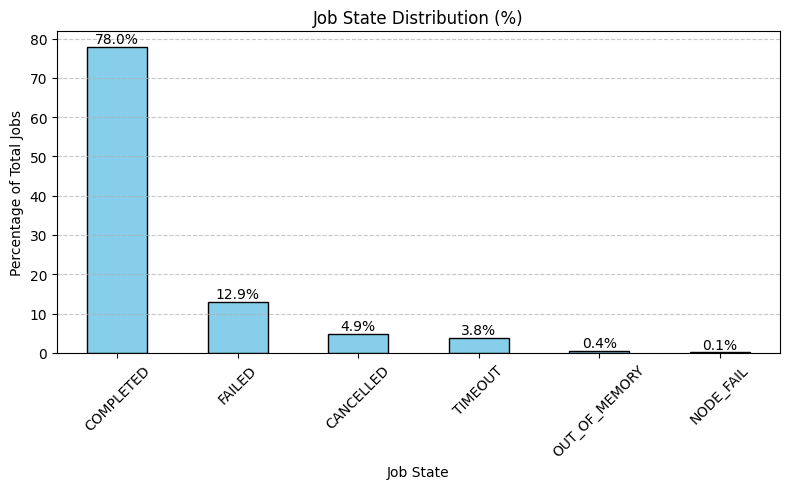

In [37]:
# Graph, in percentages
counts = df["job_state"].value_counts()
total_jobs = df.shape[0]
percentages = (counts / total_jobs) * 100

plt.figure(figsize=(8, 5))
percentages.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Job State Distribution (%)")
plt.xlabel("Job State")
plt.ylabel("Percentage of Total Jobs")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels on top of bars
for i, v in enumerate(percentages):
    plt.text(i, v + 0.2, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In any case, both job_state and state_reason are fields whose value is not known before submitting the job, then do not include them on the prediction model.

##### derived_ec

In [38]:
# Job derived_ec
print(f"Unique values for derived_ec: {df["derived_ec"].unique()}")
# These are exit codes used on HPC job traces: compact encodeing of the job completion status.

Unique values for derived_ec: ['1:0' '0:0' '0:15' '0:1' '0:9' '1:15' '0:125' '0:2' '0:11' '1:11' '0:126'
 '1:125' '1:1' '130:15' '127:15' '2:15' '1:9' '1:6' '130:6' '134:6' '0:6'
 '134:15' '134:125' '135:9' '127:6' '15:0' '127:0' '2:9' '1:2' '127:125'
 '2:11' '6:1' '134:9' '116:15' '6:15' '0:7' '7:0' '15:15' '139:0' '134:2'
 '139:15' '139:125' '127:9' '139:11' '2:125' '135:125' '130:2' '139:9'
 '2:0' '130:0' '139:2' '130:9' '8:0' '135:15' '132:9' '255:0' '7:15'
 '19:0' '132:15' '7:125' '1:126' '6:9' '13:15' '143:9' '137:9' '137:15'
 '143:15' '143:7' '137:11' '135:7' '8:15' '6:0' '13:0' '7:11' '7:9' '5:0'
 '163:0' '127:2' '127:11' '30:15' '242:15' '4:15' '130:125' '130:126'
 '132:125' '137:125' '13:9' '213:125' '213:15' '43:15' '139:6' '128:0'
 '137:6' '0:13' '1:13' '213:0' '213:2' '213:1' '43:6' '213:9' '213:126'
 '0:3' '0:36' '1:3' '100:9' '188:15' '126:0' '255:15' '1:5' '7:1' '142:0'
 '1:105' '0:105' '2:126' '7:13' '163:11' '163:125' '163:9' '7:126'
 '255:11' '255:125' '5:15' '7:7' '

After research, derived_ec is a value that is only known after the job finishes, that is part of the job accounting record written by Slurm/Slurm-like systems at completion. Then, not to be included in the prediction model.
Slurm == a type of HPC job schedulers,

##### req_switch

In [39]:
# req_switch
print(f"Unique values for req_switch: {df["req_switch"].unique()}")

Unique values for req_switch: [0 1]


In [40]:
count_0 = (df["req_switch"] == 0).sum()
count_1 = (df["req_switch"] == 1).sum()

print(f"req_switch = 0 → {count_0} entries")
print(f"req_switch = 1 → {count_1} entries")


req_switch = 0 → 231225 entries
req_switch = 1 → 13 entries


In [41]:
req_switch_1_df = df[df["req_switch"] == 1]
# req_switch_1_df.drop(columns=["cores_alloc_layout", "cores_allocated"]).head(13)

In [42]:
# After reviewing the entries for req_switch==1, confirm unique values for some fields:
cols = ["user_id", "job_state", "submit_time"]

for c in cols:
    if c == "submit_time":
        uniques = req_switch_1_df[c].dt.date.unique()   # Only interested on the date part
    else:
        uniques = req_switch_1_df[c].unique()
    print(f"\nUnique values for {c}:")
    print(uniques)


Unique values for user_id:
[1650]

Unique values for job_state:
['COMPLETED']

Unique values for submit_time:
[datetime.date(2020, 10, 11) datetime.date(2020, 10, 9)]


After looking for information about req_switch meaning, apparently it refers to a network-topology constraint parameter, used to indicate the scheduler that the user requests that the allocated nodes be connected through a limited number of switch levels to reduce latency (in these case, 1); whereas a value req_switch == 0 implies no constraint over how the scheduler can allocate the nodes across switches.
Seeing the facts related to when req_switch==1, we consider that it is almost a constant variable, not worth it to be included in the prediction model.

Note: req_switch also a field used in Slurm/Slurm-like systems (schedulers).

##### partition and qos

In [43]:
# partition
print(f"Unique values for partition: {df["partition"].unique()}")

Unique values for partition: ['1' '2' '0']


In [44]:
partition_stats = (
    df["partition"].value_counts()
      .rename_axis("partition")
      .reset_index(name="count")
)
partition_stats["percentage"] = np.round(100 * partition_stats["count"] / len(df), 3)

partition_stats

,partition,count,percentage
0,1,228276,98.719
1,0,2657,1.149
2,2,305,0.132


From research: in Slurm/Slurm-type systems, partition refers to a queue or subset of compute resources configured for particular node types or job policies -> logical group of nodes.Seeing the numbers, it is likelly that partition== 1 corresponds to the main partition, for the majority of production jobs.
The partition determines the node types, a priori is relevant for power consumption (it implies use of different hardware).
However, the distribution is very skewed.
We could hot-encode the feature, taking into account that there are not enough entries with partition 0 and 2, so unlikely the model can learn reliable patterns for them.
An option would be to add entries 0 and 2, use possible values: 1 or other.


In [45]:
partition_0_df = df[df["partition"] == '0']
# partition_0_df.drop(columns=["cores_alloc_layout", "cores_allocated"]).head(10)

In [46]:
# After reviewing the entries for partition==0, confirm unique values for some fields:
cols = ["user_id", "group_id", "job_state", "qos"]

for c in cols:
    if c == "submit_time":
        uniques = partition_0_df[c].dt.date.unique()   # Only interested on the date part
    else:
        uniques = partition_0_df[c].unique()
    print(f"\nUnique values for {c}:")
    print(uniques)


Unique values for user_id:
[1295 1635  422  494 1715 1546 1385  563 1015  112  168   38 1665   93
  547 1508  147   65  929  669 1689 1407 1539]

Unique values for group_id:
[25200]

Unique values for job_state:
['COMPLETED' 'TIMEOUT' 'OUT_OF_MEMORY' 'FAILED' 'CANCELLED' 'NODE_FAIL']

Unique values for qos:
['1' '3' '11' '9' '7']


In [47]:
# Same for partition==2, confirm unique values for some fields:
partition_2_df = df[df["partition"] == '2']
cols = ["user_id", "group_id", "job_state", "qos"]

for c in cols:
    if c == "submit_time":
        uniques = partition_2_df[c].dt.date.unique()   # Only interested on the date part
    else:
        uniques = partition_2_df[c].unique()
    print(f"\nUnique values for {c}:")
    print(uniques)


Unique values for user_id:
[1056 1356 1385   26 1554 1122  534 1546  112 1584  182]

Unique values for group_id:
[25200]

Unique values for job_state:
['FAILED' 'COMPLETED' 'TIMEOUT' 'CANCELLED' 'OUT_OF_MEMORY']

Unique values for qos:
['2']


In [48]:
# Compare users of partition 0 and 2
users_p0 = set(partition_0_df["user_id"].unique())
users_p2 = set(partition_2_df["user_id"].unique())

# See if there are common users
common_users = users_p0.intersection(users_p2)

# Print summary
print(f"Unique users in partition 0: {len(users_p0)}")
print(f"Unique users in partition 2: {len(users_p2)}")
print(f"Users appearing in both: {len(common_users)}")

# Optionally list them
if common_users:
    print("Common user IDs:", common_users)
else:
    print("No common users found.")

Unique users in partition 0: 23
Unique users in partition 2: 11
Users appearing in both: 3
Common user IDs: {np.int64(112), np.int64(1385), np.int64(1546)}


No more informative, except for the fact that all jobs launched with partition==2 have a qos==2. This likely means that QoS = 2 is a special configuration tied to partition 2 (ex: maybe a debug queue or restricted GPU pool).

Stay with the conclusion (include partition as OHE, evaluate if unify partitions 0 and 2).

In [49]:
# qos

In [50]:
print(f"Unique values for qos: {df["qos"].unique()}")

Unique values for qos: ['1' '8' '4' '2' '3' '11' '9' '7']


In [51]:
df["qos"].value_counts()

,count
qos,
1,209600
11,12857
4,6770
8,1601
2,305
9,77
3,26
7,2


In [52]:
qos_df = df[df["qos"] == '2']
cols = ['num_nodes_req', 'num_nodes_alloc', 'shared', 'num_gpus_req', 'num_gpus_alloc', 'time_limit']

for c in cols:
    if c == "submit_time":
        uniques = qos_df[c].dt.date.unique()
    else:
        uniques = qos_df[c].unique()
    print(f"\nUnique values for {c}:")
    print(uniques)

# Which is the max time_limit for this qos:
max_time = qos_df["time_limit"].max()
print(f"Overall maximum time_limit for this QoS: {max_time} seconds")



Unique values for num_nodes_req:
[ 1  2  4  5 10]

Unique values for num_nodes_alloc:
[ 1  2  4  5 10]

Unique values for shared:
['OK' '0']

Unique values for num_gpus_req:
[ 4  0  8 16 20 40  2  1]

Unique values for num_gpus_alloc:
[ 4  0  8 16 20 40  2  1]

Unique values for time_limit:
[  60   30  240 1440  720  480   10  479 1380 1200    5  300 1439  600
 1080  120  510  539]
Overall maximum time_limit for this QoS: 1440 seconds


From research, qos: is a scheduler policy label that defines limits and privileges for jobs (for ex, their maximum runtime, priority, resource limits (max.num.nodes, CPUs, GPUs per user/group), ...). That is, the qos numbers are site-specific codes that map to different policy classes configured by CINECA.

Looks like, from examination of unique values, that:
- qos==1: has a max number of num_nodes (req and alloc) of 16, and max num GPUs (req and alloc) of 64.
- qos==11: has a max number of num_nodes (req and alloc) of 16, and max num GPUs (req and alloc) of 64.
- qos==4: has a max number of num_nodes (req and alloc) of 256, and max num GPUs (req and alloc) of 1024.
- qos==8: has a max number of num_nodes (req and alloc) of 4, and max num GPUs (req and alloc) of 8.
- qos==2: has a max number of num_nodes (req and alloc) of 10, and max num GPUs (req and alloc) of 40.
- qos==9: has a number of num_nodes (req and alloc) of 1, and max num GPUs (req and alloc) of 4.
- qos==3: has a max number of num_nodes (req and alloc) of 64, and max num GPUs (req and alloc) of 256.
- qos==7: has a number of num_nodes (req and alloc) of 32, and num GPUs (req and alloc) of 128.

In [53]:
qos_stats = (
    df["qos"].value_counts()
      .rename_axis("qos")
      .reset_index(name="count")
)
qos_stats["percentage"] = np.round(100 * qos_stats["count"] / len(df), 3)

qos_stats


,qos,count,percentage
0,1,209600,90.643
1,11,12857,5.560
2,4,6770,2.928
3,8,1601,0.692
4,2,305,0.132
5,9,77,0.033
6,3,26,0.011
7,7,2,0.001


In any case, as QoS is related to resource profiles, it has a potential impact on power consumption, then useful to include in the prediction model. And it is known before job submission.
However, just in the case of partition, there is a very skewed distribution (qos==1 represent around 91% of samples).

In [54]:
# Check potential correl between partition and qos
df.groupby(["partition", "qos"]).size()

partition  qos
0          1        1156
           11       1396
           3          26
           7           2
           9          77
1          1      208444
           11      11461
           4        6770
           8        1601
2          2         305
dtype: int64

In [55]:
# Try to put number to the dependence of qos from partition
# Note: as partition and qos are nominal categorical vars, use Cramer's V metric
# to determine their dependency
from scipy.stats import chi2_contingency
# Cross-tabulation
ct = pd.crosstab(df["partition"], df["qos"])
print("\nContingency table (partition × qos):")
print(ct)

# Compute Cramér's V
chi2, p, dof, ex = chi2_contingency(ct)
n = ct.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

print(f"\nCramér's V = {cramers_v:.3f} (0=no correlation, 1=perfect correlation)")



Contingency table (partition × qos):
qos             1     11    2   3     4  7     8   9
partition                                           
0            1156   1396    0  26     0  2     0  77
1          208444  11461    0   0  6770  0  1601   0
2               0      0  305   0     0  0     0   0

Cramér's V = 0.738 (0=no correlation, 1=perfect correlation)


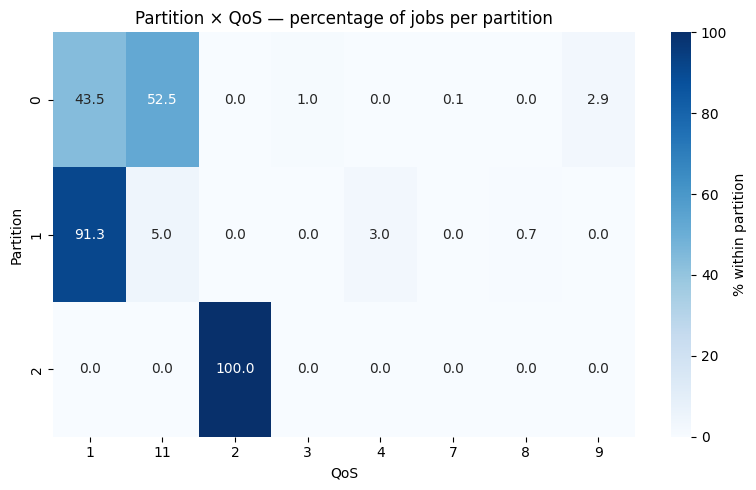

In [56]:
# Visually -> heatmap
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(8, 5))
sns.heatmap(ct_pct, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': '% within partition'})

plt.title("Partition × QoS — percentage of jobs per partition")
plt.xlabel("QoS")
plt.ylabel("Partition")
plt.tight_layout()
plt.show()

There is a strong association between qos and partition, though not perfect.
As stated before, partition is more related to the resource profiles than qos (more related to how the scheduler encodes priorities).

Then, hot encode partition in 1 and other (as very minoritary classes).

And try to keep a simplified version of qos, just in case it holds some valuable information. Consider qos 1, 4, 11, 8 as main categories and all the other values other.



In [57]:
df["partition_final"] = df["partition"].replace({0: "__other__", 2: "__other__"}).astype("category")


In [58]:
main_qos = ["1", "4", "8", "11"]
df["qos_final"] = df["qos"].astype(str).where(df["qos"].isin(main_qos), "__other__").astype("category")


For tree based regression models -> use Label-encoder of partition_final, qos_final. Ex: LabelEncoder().fit_transform(df["partition_final"])

For linear or NN regression models -> use OHE. Ex: pd.get_dummies(df, columns=["partition_clean", "qos_clean"], drop_first=True)

##### priority

In [59]:
# priority

In [60]:
print(f"Unique values for priority: {df["priority"].unique()}")

Unique values for priority: [330603  81394  80615 ... 306142 114761 401293]


In [61]:
len(df["priority"].value_counts())

65192

From research, priority column: is a value calculated by the scheduler system (Slurm/Slurm-like) to determine the priority of a job in the queue. It is a value that the scheduler calculates dynamically, taking into account several variables (time waiting, QoS, job size, ..). It is a value that is known before submission time, then available to include in the model.
However, it is a variable more related to the scheduler context than to resources, and it has a high variability (can be a noisy signal for the model). Then, exclude at least from baseline models.

##### time_limit

In [62]:
# time_limit

In [63]:
print(f"Unique values for time_limit: {df["time_limit"].unique()}")

Unique values for time_limit: [ 270   30   10  360 1440   60  100  480  120  600  720  240    1  180
 1438   80  420   15  260 1200   40    6   42    5   12   90   62  125
  359 1410  729  380   20   45  200  210  599  500  140 1160 1390 1439
  900    2  560   59  960  150   16 1389  376  779  136 1380   50  300
    8  239  840  179   29  780  710   19   76 1080   75  750  320  110
  119   70  659  299    9  121   22 1220  620 1260  980  370   61  189
  269  209  870 1320  540   11    3  610  135  740  241 1100  130  201
  340  190  255 1199  940 1139  450  735   25  479  915 1110   58  330
  181   24   28  375  220  510 1435  475  242  440  211  811   14  191
  131  280  160  185  315  250  910  390   35  505  690  132 1392  361
  195  630  675  481 1210  385  565   65    7   55  310  520  730    4
 1040 1085 1090   23  495  170  535  509 1079  855  615  839  660  290
   85  419  155  425 1140  749   89  149 1430  955  795  545 1105   98
  139  102  622  613  665  111  459  717  145  

In [64]:
len(df["time_limit"].value_counts())

348

From research: time_limit is the maximum runtime in minutes that a user allows a job to run. It is known before running the job, at submission time. It has an indirect correlation with resources and power consumption, and can be a proxy for job scale and expected duration.
Keep in the model

In [65]:
print("\nTime-limit (minutes) summary:")
print(df["time_limit"].describe())


Time-limit (minutes) summary:
count    231238.000000
mean        708.706458
std         633.951835
min           1.000000
25%          60.000000
50%         540.000000
75%        1440.000000
max        1440.000000
Name: time_limit, dtype: float64


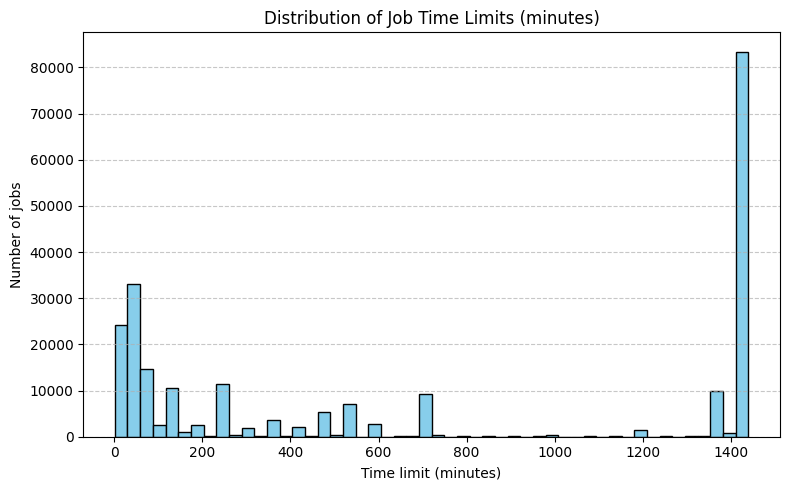

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df["time_limit"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Job Time Limits (minutes)")
plt.xlabel("Time limit (minutes)")
plt.ylabel("Number of jobs")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [67]:
# Add to df bins that classify the jobs regarding their time_limit
# Added because the may be useful at interpretation time (when analyzing feature importance)
bins = [0, 60, 300, 720, 1440]
labels = ["short (<1h)", "medium (1–5h)", "long (5–12h)", "very long (~1d)"]
df["time_limit_cat"] = pd.cut(df["time_limit"], bins=bins, labels=labels, include_lowest=True)


In [68]:
# Count number of jobs in each range
counts = df["time_limit_cat"].value_counts().sort_index()

# See in percentages too
percentages = round((counts / len(df)) * 100, 2)
percentages

,count
time_limit_cat,
short (<1h),30.72
medium (1–5h),13.69
long (5–12h),13.36
very long (~1d),42.23


In [69]:
# Also, take the Log-transform to reduce skew (can be useful for linear regressioin models)
df["log_time_limit"] = np.log1p(df["time_limit"])

# take also the scaled value (can be useful for linear/NN models)
scaler = StandardScaler()
df["time_limit_scaled"] = scaler.fit_transform(df[["log_time_limit"]])

##### shared

In [70]:
print(df["shared"].unique())

['0' 'OK' 'USER']


In [71]:
df["shared"].value_counts(dropna=False)

,count
shared,
OK,193511
0,37721
USER,6


The OK and user entries share resources between jobs, the 0 do not share. As user are negligible, count them together with OK. Then, treat as yes or no, leave as int for the models.

In [72]:
df["is_shared_job"] = df["shared"].map({
    "0": 0,
    "OK": 1,
    "USER": 1      # treat as shared
}).astype(int)

df = df.drop(columns=["shared"])

#### Groups & users

Next, understand the relationship between Group, user, jobs.

In [73]:
# Number of some unique values
print(f"Number of unique jobs: {df["job_id"].nunique()}")
print(f"Number of unique users: {df["user_id"].nunique()}")
print(f"Number of unique groups: {df["group_id"].nunique()}")

Number of unique jobs: 231238
Number of unique users: 477
Number of unique groups: 5


In [74]:
# See how many unique users there are per group
users_per_group = (
    df.groupby("group_id")["user_id"]
      .nunique()
      .reset_index(name="num_users")
)
users_per_group

,group_id,num_users
0,915,8
1,25200,468
2,30227,1
3,53482,1
4,53925,2


There is practically one group where most users are assigned, plus several minority groups. There are 5 groups in total.

In [75]:
# See if users belong to one or more groups
user_groups = (
    df.groupby("user_id")["group_id"]
      .agg(lambda x: list(set(x)))       # list of unique groups
      .reset_index()
      .assign(num_groups=lambda d: d["group_id"].apply(len))
)

mask= user_groups["num_groups"]>1
user_groups[mask]


,user_id,group_id,num_groups
28,106,"[25200, 53925]",2
219,766,"[25200, 53925]",2
465,1711,"[25200, 53482]",2


There are 3 users out of 477 that belong to more than group. They all belong to the majority group plus one of the very small groups.
Also, there is no overlap between users of group 25200 and users of group 915.

In [76]:
total = users_per_group.loc[users_per_group["group_id"].isin([915, 25200]), "num_users"].sum()
print(total)

476


Finally, there is a unique user in group 30227 that does not intersect with the other existing groups.

In [77]:
# Summary
group_summary = (
    df.groupby("group_id")
      .agg(num_users=("user_id", "nunique"),
           num_jobs=("job_id", "nunique"))
      .reset_index()
)

group_summary.head()


,group_id,num_users,num_jobs
0,915,8,14
1,25200,468,231123
2,30227,1,1
3,53482,1,90
4,53925,2,10



Most of the jobs are related to the majority group, that is then much more active than the smaller groups. There are just 115 jobs that do not come from majority group.

In [78]:
# How many jobs per user
jobs_per_user = (
    df.groupby("user_id")["job_id"]
      .count()
      .reset_index(name="num_jobs")
)

total_jobs = jobs_per_user["num_jobs"].sum()
jobs_per_user["pct_of_total"] = (jobs_per_user["num_jobs"] / total_jobs * 100).round(2)

jobs_per_user.sort_values("num_jobs", ascending=False).head(10)



,user_id,num_jobs,pct_of_total
2,8,29781,12.88
53,182,19020,8.23
465,1711,14840,6.42
191,666,11584,5.01
349,1240,11026,4.77
19,68,8518,3.68
81,284,7973,3.45
182,634,5620,2.43
21,80,5146,2.23
281,997,5112,2.21


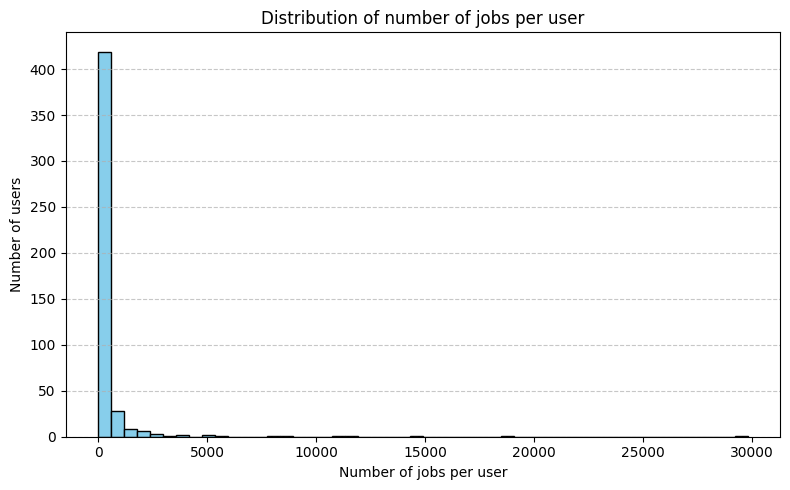

In [79]:
# Plot distribution
plt.figure(figsize=(8,5))
plt.hist(jobs_per_user["num_jobs"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Number of jobs per user")
plt.ylabel("Number of users")
plt.title("Distribution of number of jobs per user")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

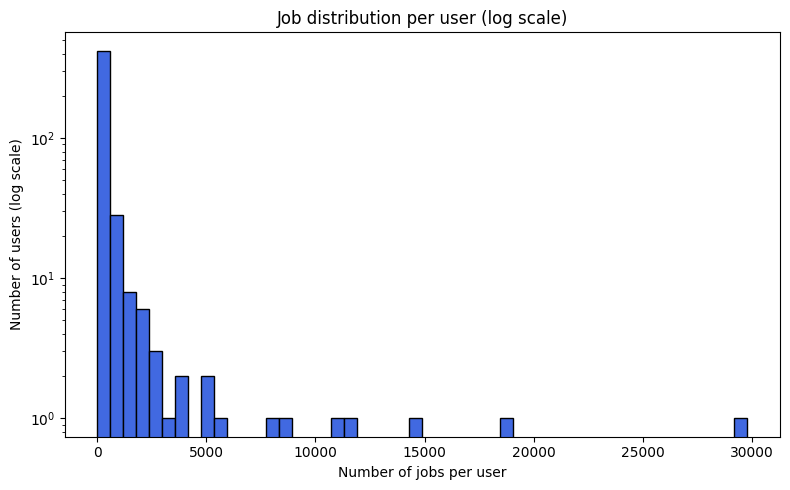

In [80]:
plt.figure(figsize=(8,5))
plt.hist(jobs_per_user["num_jobs"], bins=50, color="royalblue", edgecolor="black", log=True)
plt.xlabel("Number of jobs per user")
plt.ylabel("Number of users (log scale)")
plt.title("Job distribution per user (log scale)")
plt.tight_layout()
plt.show()

In [81]:
total_users = jobs_per_user.shape[0]
num_less_than_job_users = (jobs_per_user["num_jobs"] <= 250).sum()
pct_less_than_job_users = num_less_than_job_users / total_users * 100

print(f"Users with less than 250 jobs: {num_less_than_job_users} ({pct_less_than_job_users:.2f}%)")

num_more_than_job_users = (jobs_per_user["num_jobs"] >= 2000).sum()
pct_more_than_job_users = num_more_than_job_users / total_users * 100

print(f"Users with more than 2000 jobs: {num_more_than_job_users} ({pct_more_than_job_users:.2f}%)")

Users with less than 250 jobs: 351 (73.58%)
Users with more than 2000 jobs: 20 (4.19%)


In [82]:
jobs_per_user.describe()

,user_id,num_jobs,pct_of_total
count,477.000000,477.000000,477.000000
mean,851.857442,484.775681,0.209329
std,502.105145,2034.753662,0.880213
min,3.000000,1.000000,0.000000
25%,439.000000,13.000000,0.010000
50%,842.000000,66.000000,0.030000
75%,1274.000000,268.000000,0.120000
max,1743.000000,29781.000000,12.880000


In [83]:
# We can use the Cramer metric again for group_id and user_id
ct = pd.crosstab(df["user_id"], df["group_id"])

# Compute Cramer´s V
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

print(f"Cramer’s V = {cramers_v:.3f}")
print(f"p-value = {p:.3e}")

Cramer’s V = 0.720
p-value = 0.000e+00


In [84]:
# Check number of jobs associated to the 3 overlapping users
# Share of users with multiple groups
multi = (df.groupby("user_id")["group_id"].nunique() > 1).mean() * 100
print(f"{multi:.3f}% of users belong to more than one group")

# Jobs from those multi-group users
multi_users = df.groupby("user_id")["group_id"].nunique()
multi_user_jobs = df[df["user_id"].isin(multi_users[multi_users > 1].index)]
share_jobs = len(multi_user_jobs) / len(df) * 100
print(f"{share_jobs:.3f}% of jobs come from multi-group users")


0.629% of users belong to more than one group
6.491% of jobs come from multi-group users


In conclusion: the user to group mapping is almost one to one (three exceptions, three users belonging to 2 groups). Then, there is an almost perfecto correlation between user_id and group_id.
On the other hand, group 25200 constitutes almost the totality of the samples. Then, does not contain a lot of valuable information for the prediction task.

We could encode main group vs all other. Or we can just drop it.

Concerning user_id, power use can be user-dependent. For some kind of models (based on trees or NN based that use embeddings), it may be usefult to keep them, if we want to detect user-specific power consumption habits.

Due to the correlation between them, do not keep both features at the same time.

In [85]:
# To encode group, keeping main group, others
main_group = 25200
df["group_major"] = np.where(df["group_id"] == main_group, "main", "other")

# If we want to keep group_id without contracting it
le_group = LabelEncoder()
df["group_id_enc"] = le_group.fit_transform(df["group_id"])

In [86]:
# To keep user_id in models when we want to capture fine grain patterns or to
# study user specific habits
le_user = LabelEncoder()
df["user_id_enc"] = le_user.fit_transform(df["user_id"])

#### NAs

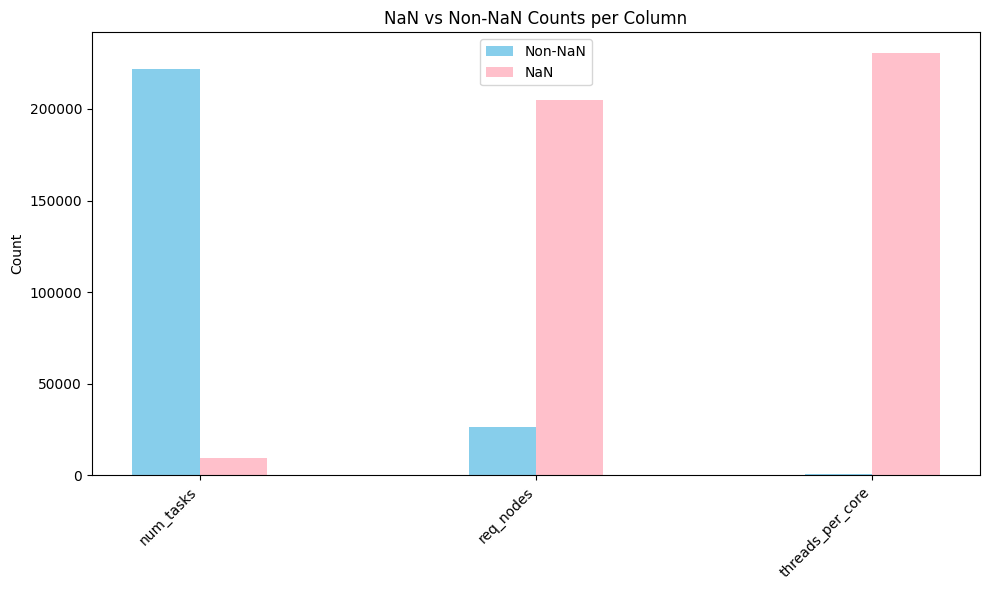

In [87]:
#Handle Missing Values
na_counts = df.isna().sum()
non_na_counts = df.notna().sum()

# Correctly get the list of column names with missing values
missing_cols = df.columns[df.isna().any()].tolist()

na_counts = df[missing_cols].isna().sum()
non_na_counts = df[missing_cols].notna().sum()

# Setup for grouped bars
x = np.arange(len(missing_cols))  # label locations
width = 0.20  # width of the bars

plt.figure(figsize=(10,6))
plt.bar(x - width/2, non_na_counts, width, label='Non-NaN', color='skyblue')
plt.bar(x + width/2, na_counts, width, label='NaN', color='pink')

plt.xticks(x, missing_cols, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('NaN vs Non-NaN Counts per Column')
plt.legend()
plt.tight_layout()
plt.show()

The columns that have NAs are the following:


*  num_tasks Number of tasks requested by a job or job step | int-> 4% NAs
*  threads_per_core Threads per core required by job | int -> 89% NAs
*  req_nodes Comma-separated list of required nodes | string -> 99.6% NAS













##### num_tasks NAs

In [88]:
df_not_na=df_n_task_not_na=df[df['num_tasks'].notna()]
df_not_na.head(1)

,job_id,user_id,group_id,job_state,state_reason,submit_time,eligible_time,start_time,end_time,run_time,time_limit,num_nodes_req,num_nodes_alloc,num_cores_req,num_cores_alloc,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,nodes,num_tasks,cores_per_task,req_nodes,req_switch,partition,priority,qos,derived_ec,threads_per_core,node_power_consumption,mem_power_consumption,cpu_power_consumption,partition_final,qos_final,time_limit_cat,log_time_limit,time_limit_scaled,is_shared_job,group_major,group_id_enc,user_id_enc
0,2913594,310,25200,CANCELLED,None,2020-05-31 22:09:29+00:00,2020-05-31 22:09:29+00:00,2020-05-31 22:09:30+00:00,2020-05-31 22:21:33+00:00,723,270,16,16,256,2048,64,64,475,3800,"[900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915]",64,4,None,0,1,330603,1,1:0,NaN,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]",1,1,medium (1–5h),5.602119,-0.007838,0,main,1,86


After the information obtained about num_tasks field in previous section "Other relations between columns", we think that the best approach is to both calculate the right value for num_tasks and flag those entries where the num_tasks is different to num_tasks_calc (either because the former is NA or does not correspond).

Done that, we can choose as num_tasks_final (value to introduce into the model) as either containing the calculated value for the NA entries and leave the model to learn the inconsistent values, or make num_tasks_final = num_tasks_calc.
To decide.

Code that follows corresponds to the former option (take out NA and leave inconsistencies).

In [89]:
# Calculate derived number of tasks
df["num_tasks_calc"] = (df["num_cores_req"] // df["cores_per_task"]).astype("Int64")

# Create flag for missing or inconsistent num_tasks
df["num_tasks_missing_or_inconsistent"] = (
    df["num_tasks"].isna() |
    (df["num_tasks"] * df["cores_per_task"] != df["num_cores_req"])
)

# Fill missing with calculated value
df["num_tasks_final"] = df["num_tasks"]
df.loc[df["num_tasks"].isna(), "num_tasks_final"] = df.loc[df["num_tasks"].isna(), "num_tasks_calc"]

# Check how many filled
filled = df["num_tasks"].isna().sum()
print(f"Filled {filled} missing num_tasks ({filled/len(df)*100:.2f}%)")


Filled 9457 missing num_tasks (4.09%)


##### req_nodes NAs

In [90]:
# Look into req_nodes entries non NA
df_not_na=df_n_task_not_na=df[df['req_nodes'].notna()]
print(len(df_not_na))
df_not_na.head()

26296


,job_id,user_id,group_id,job_state,state_reason,submit_time,eligible_time,start_time,end_time,run_time,time_limit,num_nodes_req,num_nodes_alloc,num_cores_req,num_cores_alloc,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,nodes,num_tasks,cores_per_task,req_nodes,req_switch,partition,priority,qos,derived_ec,threads_per_core,node_power_consumption,mem_power_consumption,cpu_power_consumption,partition_final,qos_final,time_limit_cat,log_time_limit,time_limit_scaled,is_shared_job,group_major,group_id_enc,user_id_enc,num_tasks_calc,num_tasks_missing_or_inconsistent,num_tasks_final
5,4672495,284,25200,COMPLETED,None,2020-05-21 23:06:05+00:00,2020-05-21 23:06:05+00:00,2020-05-21 23:07:00+00:00,2020-05-21 23:07:18+00:00,18,10,1,1,4,4,0,0,240,240,[763],1,4,[763],0,1,87034,1,0:0,NaN,[560],[36],[102],1,1,short (<1h),2.397895,-1.833835,1,main,1,81,1,False,1
6,1499291,284,25200,COMPLETED,None,2020-05-21 23:06:10+00:00,2020-05-21 23:06:10+00:00,2020-05-21 23:07:00+00:00,2020-05-21 23:07:19+00:00,19,10,1,1,4,4,0,0,240,240,[878],1,4,[878],0,1,85884,1,0:0,NaN,[560],[48],[88],1,1,short (<1h),2.397895,-1.833835,1,main,1,81,1,False,1
8,5527314,284,25200,COMPLETED,None,2020-05-21 23:05:39+00:00,2020-05-21 23:05:39+00:00,2020-05-22 18:39:06+00:00,2020-05-22 18:39:26+00:00,20,10,1,1,4,4,0,0,240,240,[94],1,4,[94],0,1,115982,1,0:0,NaN,[680],[36],[50],1,1,short (<1h),2.397895,-1.833835,1,main,1,81,1,False,1
9,4672172,284,25200,COMPLETED,None,2020-05-21 23:06:06+00:00,2020-05-21 23:06:06+00:00,2020-05-21 23:07:00+00:00,2020-05-21 23:07:18+00:00,18,10,1,1,4,4,0,0,240,240,[773],1,4,[773],0,1,86934,1,0:0,NaN,[560],[38],[84],1,1,short (<1h),2.397895,-1.833835,1,main,1,81,1,False,1
13,2138872,284,25200,COMPLETED,None,2020-05-21 23:05:43+00:00,2020-05-21 23:05:43+00:00,2020-05-22 05:17:28+00:00,2020-05-22 05:17:47+00:00,19,10,1,1,4,4,0,0,240,240,[206],1,4,[206],0,1,99490,1,0:0,NaN,[540],[36],[74],1,1,short (<1h),2.397895,-1.833835,1,main,1,81,1,False,1


In [91]:
# See about the content of columns nodes and req_nodes
print(df_not_na["nodes"].iloc[0])
print(df_not_na["req_nodes"].iloc[0])
print(type(df_not_na["nodes"].iloc[0]), type(df_not_na["req_nodes"].iloc[0]))

[763]
[763]
<class 'numpy.ndarray'> <class 'str'>


In [92]:
# In order to compare them, normalize them to the same type
def normalize_nodes(x):
    """Return a flat list[str] of node IDs.
       - arrays/lists/tuples → flattened list
       - comma-separated strings (possibly like '[[763]]') → split by ','
    """
    # ndarray → list
    if isinstance(x, np.ndarray):
        x = x.tolist()

    # lists/tuples → flatten one level, cast to str
    if isinstance(x, (list, tuple)):
        flat = []
        for v in x:
            if isinstance(v, (list, tuple, np.ndarray)):
                flat.extend(np.array(v).ravel().tolist())
            else:
                flat.append(v)
        return [str(t).strip() for t in flat if pd.notna(t) and str(t).strip() != ""]

    # strings → remove brackets then split by comma
    if isinstance(x, str):
        s = x.strip()
        # remove any number of surrounding brackets like [[763]] → 763
        while s.startswith("[") and s.endswith("]"):
            s = s[1:-1].strip()
        if s == "":
            return []
        return [tok.strip() for tok in s.split(",") if tok.strip() != ""]

    return []

# Work on a copy to avoid: SettingWithCopyWarning
df_sub = df_not_na.copy()

df_sub["nodes_list"] = df_sub["nodes"].apply(normalize_nodes)
df_sub["req_nodes_list"] = df_sub["req_nodes"].apply(normalize_nodes)

# Compare as sets (order-insensitive)
df_sub["same_nodes"] = [
    set(map(str, a)) == set(map(str, b))
    for a, b in zip(df_sub["nodes_list"], df_sub["req_nodes_list"])
]

print(df_sub["same_nodes"].value_counts(dropna=False))
print(f"Percentage identical: {df_sub['same_nodes'].mean()*100:.2f}%")


same_nodes
True     26279
False       17
Name: count, dtype: int64
Percentage identical: 99.94%


In [93]:
df_diff = df_sub[df_sub["same_nodes"] == False]
print(len(df_diff))
df_diff.head()


17


,job_id,user_id,group_id,job_state,state_reason,submit_time,eligible_time,start_time,end_time,run_time,time_limit,num_nodes_req,num_nodes_alloc,num_cores_req,num_cores_alloc,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,nodes,num_tasks,cores_per_task,req_nodes,req_switch,partition,priority,qos,derived_ec,threads_per_core,node_power_consumption,mem_power_consumption,cpu_power_consumption,partition_final,qos_final,time_limit_cat,log_time_limit,time_limit_scaled,is_shared_job,group_major,group_id_enc,user_id_enc,num_tasks_calc,num_tasks_missing_or_inconsistent,num_tasks_final,nodes_list,req_nodes_list,same_nodes
1696,183033,571,25200,COMPLETED,None,2020-05-24 16:36:11+00:00,2020-05-24 16:36:11+00:00,2020-05-24 16:36:12+00:00,2020-05-24 16:36:41+00:00,29,30,2,2,2,8,8,8,3,14,"[700, 704]",2,1,[704],0,1,320490,1,1:0,NaN,"[1010, 1010]","[72, 72]","[132, 104]",1,1,short (<1h),3.433987,-1.243395,1,main,1,165,2,False,2,"[700, 704]",[704],False
1752,1574037,571,25200,CANCELLED,None,2020-05-24 17:48:21+00:00,2020-05-24 17:48:21+00:00,2020-05-24 17:48:22+00:00,2020-05-24 17:50:50+00:00,148,30,2,2,2,8,8,8,3,14,"[700, 704]",2,1,[704],0,1,320501,1,0:15,NaN,"[1020, 1020, 1020, 1020, 1020, 1020, 1020]","[72, 72, 72, 38, 72, 72, 72]","[94, 96, 96, 64, 94, 94, 124]",1,1,short (<1h),3.433987,-1.243395,1,main,1,165,2,False,2,"[700, 704]",[704],False
2019,3927943,571,25200,CANCELLED,None,2020-05-24 17:56:01+00:00,2020-05-24 17:56:01+00:00,2020-05-24 17:56:02+00:00,2020-05-24 17:56:56+00:00,54,30,2,2,2,8,8,8,3,14,"[700, 704]",2,1,[704],0,1,320403,1,0:15,NaN,"[1020, 1020]","[36, 72]","[64, 98]",1,1,short (<1h),3.433987,-1.243395,1,main,1,165,2,False,2,"[700, 704]",[704],False
2054,4297566,571,25200,COMPLETED,None,2020-05-24 16:30:58+00:00,2020-05-24 16:30:58+00:00,2020-05-24 16:30:59+00:00,2020-05-24 16:31:29+00:00,30,30,2,2,2,8,8,8,3,14,"[700, 704]",2,1,[704],0,1,320509,1,1:0,NaN,"[1020, 1000]","[72, 74]","[144, 108]",1,1,short (<1h),3.433987,-1.243395,1,main,1,165,2,False,2,"[700, 704]",[704],False
2291,6176680,571,25200,COMPLETED,None,2020-05-24 18:00:36+00:00,2020-05-24 18:00:36+00:00,2020-05-24 18:00:36+00:00,2020-05-24 18:01:12+00:00,36,30,2,2,2,8,8,8,3,14,"[700, 704]",2,1,[704],0,1,320368,1,1:15,NaN,"[1030, 1020]",[72],[126],1,1,short (<1h),3.433987,-1.243395,1,main,1,165,2,False,2,"[700, 704]",[704],False


We can see that when req_nodes is not NA, it almost matches the content of nodes.
However, nodes is a field that is not informed before launching a job.
Seeing this and the elevated number of NAs in req_nodes (around 205000 values are missing), better to drop this column.

We may leave a flag to inform that the job had requested nodes.

In [94]:
df["has_req_nodes"] = df["req_nodes"].notna().astype(int)
df = df.drop(columns=["req_nodes", "nodes"])


##### threads_per_core NAs

In [95]:
df_threads_per_core_not_na=df[df['threads_per_core'].notna()]
len(df_threads_per_core_not_na)

904

Better to drop threads_per_core, value that the scheduler sets only if a user requests a given value. Otherwise, schedule leaves it as NA.

Could also leave a flag, like in the req_nodes.

In [96]:
df["has_req_threads_per_core"] = df["threads_per_core"].notna().astype(int)
df = df.drop(columns=["threads_per_core"])

In [97]:
# Conclusion: eliminate req_nodes and threads_per_core, potentially flag them.

#### Variables that we maintain in the study

Taking into account the information gathered and the goal of the project, these are the variables that we are maintaining:
- group_id or user_id (to decide)
- required columns: they represent resource demand, then they correlate with the power consumption.
- submit_time: we can use it to extract time patterns, through OHE.
- time_limit: keep it and its treatment.


These are the variables that we are no longer considering:
- Allocated columns: as they are known after starting a job.
- Start, eligible,  end time: not previous to job start.
- job_state, state_reason, derived_ec: they depend on the job execution or on the scheduler result.
- req_nodes and thread_per_core: too many NAs on them (we flag them).
- req_switch, priority.
- cpu_power_consumption, mem_power_consumption: they are a portion of node_power_consumption, not clear whether is it worth it to carry with them as targets?

We transform and drop the originals:
partition, qos, num_tasks, shared

#### OHE

In [98]:
# One-hot encode the day of the week: dow -> day of the week
# Extract day of week (0=Mon, 6=Sun)
df["submit_dayofweek"] = df["submit_time"].dt.dayofweek

# One-hot encode
df = pd.get_dummies(df, columns=["submit_dayofweek"], prefix="dow")

In [99]:
# One-hot encode the day of the month: dom -> day of the month
df["submit_day"] = df["submit_time"].dt.day
df = pd.get_dummies(df, columns=["submit_day"], prefix="dom")

In [100]:
# One-hot encode the hour
df["submit_hour"] = df["submit_time"].dt.hour
df = pd.get_dummies(df, columns=["submit_hour"], prefix="hour")

In [101]:
# If performing regression linear or NN, use for partition_final and qos_final OHE
pd.get_dummies(df, columns=["partition_final", "qos_final"], drop_first=True)

KeyboardInterrupt: 

## 2. Pipeline for preprocessing

In [102]:
# Read the Marconi 100 data (job table)
df = pd.read_parquet("job_table.parquet")

# Standard transformation over times to ensure they are formated properly.
df["submit_time"]   = pd.to_datetime(df["submit_time"],   utc=True, errors="coerce")

# All num_task are integers → convert column to integer type
df["num_tasks"] = num.round().astype("Int64")

# TRANSFORMATIONS OVER FEATURES
# partition
df["partition_final"] = df["partition"].replace({0: "__other__", 2: "__other__"}).astype("category")

# qos
main_qos = ["1", "4", "8", "11"]
df["qos_final"] = df["qos"].astype(str).where(df["qos"].isin(main_qos), "__other__").astype("category")

df = df.drop(columns=["partition", "qos"])

# time_limit
# Add to df bins that classify the jobs regarding their time_limit
# Added because the may be useful at interpretation time (when analyzing feature importance)
bins = [0, 60, 300, 720, 1440]
labels = ["short (<1h)", "medium (1–5h)", "long (5–12h)", "very long (~1d)"]
df["time_limit_cat"] = pd.cut(df["time_limit"], bins=bins, labels=labels, include_lowest=True)

# Also, take the Log-transform to reduce skew (can be useful for linear regressioin models)
df["log_time_limit"] = np.log1p(df["time_limit"])

# take also the scaled value (can be useful for linear/NN models)
scaler = StandardScaler()
df["time_limit_scaled"] = scaler.fit_transform(df[["log_time_limit"]])

# req_nodes
df["has_req_nodes"] = df["req_nodes"].notna().astype(int)
df = df.drop(columns=["req_nodes", "nodes"])

# threads_per_core
df["has_req_threads_per_core"] = df["threads_per_core"].notna().astype(int)
df = df.drop(columns=["threads_per_core"])

# shared
df["is_shared_job"] = df["shared"].map({
    "0": 0,
    "OK": 1,
    "USER": 1
}).astype(int)

df = df.drop(columns=["shared"])

# TO BE DECIDED FOR group_id and user_id, depending on what we want to do
# OBS: do not keep both at the same time due to their correl
# To encode group, keeping main group, others
main_group = 25200
df["group_major"] = np.where(df["group_id"] == main_group, "main", "other")

# If we want to keep group_id without contracting it
"""le_group = LabelEncoder()
df["group_id_enc"] = le_group.fit_transform(df["group_id"])""" # Assume for now we keep group_id contracted

"""# To keep user_id in models when we want to capture fine grain patterns or to
# study user specific habits
le_user = LabelEncoder()
df["user_id_enc"] = le_user.fit_transform(df["user_id"])""" # Assume for now we keep group_id

# TO CONFIRM FOR num_tasks
# Calculate derived number of tasks
df["num_tasks_calc"] = (df["num_cores_req"] // df["cores_per_task"]).astype("Int64")

# Create flag for missing or inconsistent num_tasks
df["num_tasks_missing_or_inconsistent"] = (
    df["num_tasks"].isna() |
    (df["num_tasks"] * df["cores_per_task"] != df["num_cores_req"])
)

# Fill missing with calculated value -> use num_tasks_final in models
df["num_tasks_final"] = df["num_tasks"]
df.loc[df["num_tasks"].isna(), "num_tasks_final"] = df.loc[df["num_tasks"].isna(), "num_tasks_calc"]

df = df.drop(columns=["num_tasks", "num_tasks_calc"]) # Confirm whether to just leave num_tasks_calc and not considering the final

# OHE for submit_time
# One-hot encode the day of the week: dow -> day of the week
# Extract day of week (0=Mon, 6=Sun)
df["submit_dayofweek"] = df["submit_time"].dt.dayofweek

# One-hot encode
df = pd.get_dummies(df, columns=["submit_dayofweek"], prefix="dow")

# One-hot encode the day of the month: dom -> day of the month
df["submit_day"] = df["submit_time"].dt.day
df = pd.get_dummies(df, columns=["submit_day"], prefix="dom")

# One-hot encode the hour
df["submit_hour"] = df["submit_time"].dt.hour
df = pd.get_dummies(df, columns=["submit_hour"], prefix="hour")

# FEATURES TO BE DROPPED
cols_to_drop_times=['eligible_time', 'start_time', 'end_time', 'run_time']
cols_to_drop_alloc = ['num_nodes_alloc', 'num_cores_alloc', 'shared', 'num_gpus_alloc',
               'mem_alloc','cores_alloc_layout', 'cores_allocated']
cols_to_drop_job= ['job_id','job_state', 'state_reason']
cols_to_drop_others = ['req_switch', 'priority', 'derived_ec']
cols_to_drop_group_or_user = ['user_id'] # Fill with either group_id or user_id

cols_to_drop = (
    cols_to_drop_times
    + cols_to_drop_alloc
    + cols_to_drop_job
    + cols_to_drop_others
    + cols_to_drop_group_or_user
)

df = df.drop(columns=cols_to_drop, errors="ignore")



Options that depend on model to be run:

In [103]:
# If linear/NN regression:
features_linear= df.copy()
pd.get_dummies(features_linear, columns=["partition_final", "qos_final"], drop_first=True)

features_linear = features_linear.drop(columns=["time_limit", "log_time_limit"])

In [104]:
features_linear.head(1)

,cores_per_task,group_id,num_cores_req,num_nodes_req,submit_time,num_gpus_req,mem_req,node_power_consumption,mem_power_consumption,cpu_power_consumption,partition_final,qos_final,time_limit_cat,time_limit_scaled,has_req_nodes,has_req_threads_per_core,is_shared_job,group_major,num_tasks_missing_or_inconsistent,num_tasks_final,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,4,25200,256,16,2020-05-31 22:09:29+00:00,64,475,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]",1,1,medium (1–5h),-0.007838,0,0,0,main,False,64,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [105]:
len(features_linear.columns)

82

In [106]:
ordered_cols_linear=['group_id', 'group_major','submit_time','time_limit_cat', 'time_limit_scaled',
                     'num_nodes_req', 'has_req_nodes','num_cores_req', 'cores_per_task', 'num_tasks_final',
                     'num_gpus_req', 'mem_req', 'has_req_threads_per_core', 'is_shared_job', 'num_tasks_missing_or_inconsistent',
                     'partition_final','qos_final',
                     'dow_0','dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dom_1', 'dom_2',
                    'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10',
                    'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17',
                    'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24',
                    'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31',
                    'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
                    'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
                    'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
                    'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
                  'node_power_consumption','mem_power_consumption', 'cpu_power_consumption']

In [107]:
features_linear = features_linear[ordered_cols_linear]
print(len(features_linear.columns))
features_linear.head(1)

82


,group_id,group_major,submit_time,time_limit_cat,time_limit_scaled,num_nodes_req,has_req_nodes,num_cores_req,cores_per_task,num_tasks_final,num_gpus_req,mem_req,has_req_threads_per_core,is_shared_job,num_tasks_missing_or_inconsistent,partition_final,qos_final,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,node_power_consumption,mem_power_consumption,cpu_power_consumption
0,25200,main,2020-05-31 22:09:29+00:00,medium (1–5h),-0.007838,16,0,256,4,64,64,475,0,0,False,1,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]"


In [108]:
# If tree models
features_tree= df.copy()
LabelEncoder().fit_transform(features_tree["partition_final"])
LabelEncoder().fit_transform(features_tree["qos_final"])
features_tree = features_tree.drop(columns=["partition_final", "qos_final"])

features_tree = features_tree.drop(columns=["log_time_limit", "time_limit_scaled"])

In [109]:
len(features_tree.columns)

80

In [110]:
ordered_cols_tree = ['group_id', 'group_major','submit_time', 'time_limit','num_nodes_req',
                     'has_req_nodes','num_cores_req','cores_per_task', 'num_tasks_final', 'num_gpus_req',
                     'mem_req','has_req_threads_per_core', 'is_shared_job', 'num_tasks_missing_or_inconsistent',
                     'time_limit_cat','dow_0',
                    'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dom_1', 'dom_2',
                    'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10',
                    'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17',
                    'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24',
                    'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31',
                    'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
                    'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
                    'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
                    'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
                     'node_power_consumption', 'mem_power_consumption','cpu_power_consumption']

In [111]:
features_tree = features_tree[ordered_cols_tree]
print(len(features_tree.columns))
features_tree.head(1)

80


,group_id,group_major,submit_time,time_limit,num_nodes_req,has_req_nodes,num_cores_req,cores_per_task,num_tasks_final,num_gpus_req,mem_req,has_req_threads_per_core,is_shared_job,num_tasks_missing_or_inconsistent,time_limit_cat,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dom_1,dom_2,dom_3,dom_4,dom_5,dom_6,dom_7,dom_8,dom_9,dom_10,dom_11,dom_12,dom_13,dom_14,dom_15,dom_16,dom_17,dom_18,dom_19,dom_20,dom_21,dom_22,dom_23,dom_24,dom_25,dom_26,dom_27,dom_28,dom_29,dom_30,dom_31,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,node_power_consumption,mem_power_consumption,cpu_power_consumption
0,25200,main,2020-05-31 22:09:29+00:00,270,16,0,256,4,64,64,475,0,0,False,medium (1–5h),False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]"


### 2.1. Pipeline functions

In [112]:
# Create function that gives back: features_linear, features_tree, and considers whether to include as targets
# mem and cpu power consumption

In [113]:
def order_cols_linear(df):
  # Function that keeps the order of the columns for linear case. Returns the ordered df.
  ordered_cols_linear=['group_id', 'group_major','submit_time','time_limit_cat', 'time_limit_scaled',
                     'num_nodes_req', 'has_req_nodes','num_cores_req', 'cores_per_task', 'num_tasks_final',
                     'num_gpus_req', 'mem_req', 'has_req_threads_per_core', 'is_shared_job', 'num_tasks_missing_or_inconsistent',
                     'partition_final','qos_final',
                     'dow_0','dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dom_1', 'dom_2',
                    'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10',
                    'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17',
                    'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24',
                    'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31',
                    'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
                    'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
                    'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
                    'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
                  'node_power_consumption','mem_power_consumption', 'cpu_power_consumption']
  return df[ordered_cols_linear]


In [114]:
def order_cols_tree(df):
  # Function that keeps the order of the columns for tree case. Returns the ordered df.
  ordered_cols_tree = ['group_id', 'group_major','submit_time', 'time_limit','num_nodes_req',
                     'has_req_nodes','num_cores_req','cores_per_task', 'num_tasks_final', 'num_gpus_req',
                     'mem_req','has_req_threads_per_core', 'is_shared_job', 'num_tasks_missing_or_inconsistent',
                     'time_limit_cat','dow_0',
                    'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dom_1', 'dom_2',
                    'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10',
                    'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17',
                    'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24',
                    'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31',
                    'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
                    'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
                    'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
                    'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
                     'node_power_consumption', 'mem_power_consumption','cpu_power_consumption']
  return df[ordered_cols_tree]

In [115]:
def pipeline_features(df, linear= True, include_cpu=False, include_mem=False):
  """Function that loads the data of Marconi100 and makes the appropriate transformations
     in order to return the df needed for the regression task.
     Arguments:
     - linear= True if the model to be applied is linear/NN regression. False if it is a tree model.
     - include_cpu: True if we want to include cpu power consumption in the model. False otherwise.
     - include_mem: True if we want to include mem power consumption in the model. False otherwise.

     Returns: df with the features needed for the model.
     """
  # Read the Marconi 100 data (job table)
  df = pd.read_parquet("job_table.parquet")

  # Standard transformation over times to ensure they are formated properly.
  df["submit_time"]   = pd.to_datetime(df["submit_time"],   utc=True, errors="coerce")

  # All num_task are integers → convert column to integer type
  df["num_tasks"] = num.round().astype("Int64")

  # TRANSFORMATIONS OVER FEATURES
  # partition
  df["partition_final"] = df["partition"].replace({0: "__other__", 2: "__other__"}).astype("category")

  # qos
  main_qos = ["1", "4", "8", "11"]
  df["qos_final"] = df["qos"].astype(str).where(df["qos"].isin(main_qos), "__other__").astype("category")

  df = df.drop(columns=["partition", "qos"])

  # time_limit
  # Add to df bins that classify the jobs regarding their time_limit
  # Added because the may be useful at interpretation time (when analyzing feature importance)
  bins = [0, 60, 300, 720, 1440]
  labels = ["short (<1h)", "medium (1–5h)", "long (5–12h)", "very long (~1d)"]
  df["time_limit_cat"] = pd.cut(df["time_limit"], bins=bins, labels=labels, include_lowest=True)

  # Also, take the Log-transform to reduce skew (can be useful for linear regressioin models)
  df["log_time_limit"] = np.log1p(df["time_limit"])

  # take also the scaled value (can be useful for linear/NN models)
  scaler = StandardScaler()
  df["time_limit_scaled"] = scaler.fit_transform(df[["log_time_limit"]])

  # req_nodes
  df["has_req_nodes"] = df["req_nodes"].notna().astype(int)
  df = df.drop(columns=["req_nodes", "nodes"])

  # threads_per_core
  df["has_req_threads_per_core"] = df["threads_per_core"].notna().astype(int)
  df = df.drop(columns=["threads_per_core"])

  # shared
  df["is_shared_job"] = df["shared"].map({
      "0": 0,
      "OK": 1,
      "USER": 1
  }).astype(int)

  df = df.drop(columns=["shared"])

  # TO BE DECIDED FOR group_id and user_id, depending on what we want to do
  # OBS: do not keep both at the same time due to their correl
  # To encode group, keeping main group, others
  main_group = 25200
  df["group_major"] = np.where(df["group_id"] == main_group, "main", "other")

  # If we want to keep group_id without contracting it
  """le_group = LabelEncoder()
  df["group_id_enc"] = le_group.fit_transform(df["group_id"])""" # Assume for now we keep group_id contracted

  """# To keep user_id in models when we want to capture fine grain patterns or to
  # study user specific habits
  le_user = LabelEncoder()
  df["user_id_enc"] = le_user.fit_transform(df["user_id"])""" # Assume for now we keep group_id

  # TO CONFIRM FOR num_tasks
  # Calculate derived number of tasks
  df["num_tasks_calc"] = (df["num_cores_req"] // df["cores_per_task"]).astype("Int64")

  # Create flag for missing or inconsistent num_tasks
  df["num_tasks_missing_or_inconsistent"] = (
      df["num_tasks"].isna() |
      (df["num_tasks"] * df["cores_per_task"] != df["num_cores_req"])
  )

  # Fill missing with calculated value -> use num_tasks_final in models
  df["num_tasks_final"] = df["num_tasks"]
  df.loc[df["num_tasks"].isna(), "num_tasks_final"] = df.loc[df["num_tasks"].isna(), "num_tasks_calc"]

  df = df.drop(columns=["num_tasks", "num_tasks_calc"]) # Confirm whether to just leave num_tasks_calc and not considering the final

  # OHE for submit_time
  # One-hot encode the day of the week: dow -> day of the week
  # Extract day of week (0=Mon, 6=Sun)
  df["submit_dayofweek"] = df["submit_time"].dt.dayofweek

  # One-hot encode
  df = pd.get_dummies(df, columns=["submit_dayofweek"], prefix="dow")

  # One-hot encode the day of the month: dom -> day of the month
  df["submit_day"] = df["submit_time"].dt.day
  df = pd.get_dummies(df, columns=["submit_day"], prefix="dom")

  # One-hot encode the hour
  df["submit_hour"] = df["submit_time"].dt.hour
  df = pd.get_dummies(df, columns=["submit_hour"], prefix="hour")

  # FEATURES TO BE DROPPED
  cols_to_drop_times=['eligible_time', 'start_time', 'end_time', 'run_time']
  cols_to_drop_alloc = ['num_nodes_alloc', 'num_cores_alloc', 'shared', 'num_gpus_alloc',
                'mem_alloc','cores_alloc_layout', 'cores_allocated']
  cols_to_drop_job= ['job_id','job_state', 'state_reason']
  cols_to_drop_others = ['req_switch', 'priority', 'derived_ec']
  cols_to_drop_group_or_user = ['user_id'] # Fill with either group_id or user_id

  cols_to_drop = (
      cols_to_drop_times
      + cols_to_drop_alloc
      + cols_to_drop_job
      + cols_to_drop_others
      + cols_to_drop_group_or_user
  )

  df = df.drop(columns=cols_to_drop, errors="ignore")
  if not include_cpu:
    df = df.drop(columns=["cpu_power_consumption"])
  if not include_mem:
    df = df.drop(columns=["mem_power_consumption"])

  if linear:
    pd.get_dummies(df, columns=["partition_final", "qos_final"], drop_first=True)
    df = df.drop(columns=["time_limit", "log_time_limit"])
    df = order_cols_linear(df)
  else:
    LabelEncoder().fit_transform(df["partition_final"])
    LabelEncoder().fit_transform(df["qos_final"])
    df = df.drop(columns=["partition_final", "qos_final"])
    df = df.drop(columns=["log_time_limit", "time_limit_scaled"])
    df = order_cols_tree(df)

  return df


In [116]:
df= pipeline_features(df, linear=False, include_cpu=True, include_mem=True)
len(df.columns)

80

In [117]:
df= pipeline_features(df, linear=True, include_cpu=True, include_mem=True)
len(df.columns)

82

### 2.2. Outliers

Keep from the initial exploration code the cells that refer to outliers: to be done yet

#### Understand measures in power_consumption lists

Need to understand why there is more power consumption readings than nodes, in order to be able to extract the information by nodes.

First, calculate number of nodes, length of power_consumption lists.
Plot a boxplot of columns of interest.

In [126]:
# Re-load the original dataframe to ensure all columns are present for this analysis
df = pd.read_parquet("job_table.parquet")

# Standard transformation over times to ensure they are formated properly.
df["start_time"] = pd.to_datetime(df["start_time"], utc=True, errors="coerce")
df["end_time"]   = pd.to_datetime(df["end_time"],   utc=True, errors="coerce")
df["eligible_time"] = pd.to_datetime(df["eligible_time"], utc=True, errors="coerce")
df["submit_time"]   = pd.to_datetime(df["submit_time"],   utc=True, errors="coerce")

# Quick check, runtime = end - start
# Calculate the job duration in seconds
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()
# Compare duration with runtime
df["runtime_check"]= (df["run_time"]==df["duration"])
df["runtime_check"].value_counts()

# As runtime is correct, we can use it when calculating runtime/length(power_consumption)
# Lengths vs nodes
df["n_nodes"] = df["nodes"].apply(len)
df["len_power"] = df["node_power_consumption"].apply(len)
df["len_mem_power"] = df["mem_power_consumption"].apply(len)
df["len_cpu_power"] = df["cpu_power_consumption"].apply(len)
df[["job_id","n_nodes","len_power","len_mem_power","len_cpu_power","run_time"]].head()

,job_id,n_nodes,len_power,len_mem_power,len_cpu_power,run_time
0,2913594,16,36,36,36,723
1,4063066,16,58,58,58,1157
2,5730196,16,45,45,45,881
3,3047960,1,53,48,48,1133
4,5749077,1,48,41,41,1046


In [128]:
# As runtime is correct, we can use it when calculating runtime/length(power_consumption)
# Lengths vs nodes
df["n_nodes"] = df["nodes"].apply(len)
df["len_power"] = df["node_power_consumption"].apply(len)
df[["job_id","n_nodes","len_power","run_time"]].head()

,job_id,n_nodes,len_power,run_time
0,2913594,16,36,723
1,4063066,16,58,1157
2,5730196,16,45,881
3,3047960,1,53,1133
4,5749077,1,48,1046


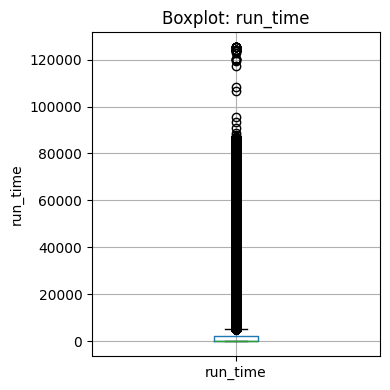

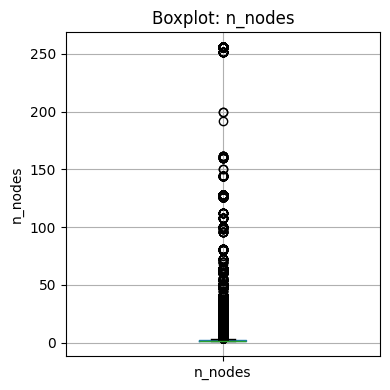

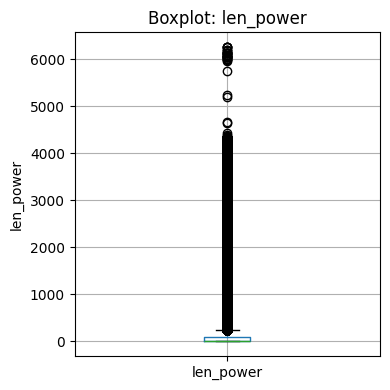

In [129]:
# Boxplot of selected variables
# Keep numeric columns
cols = ["run_time", "n_nodes", "len_power"]
num_df = df[cols].copy()

# Drop columns with all-NaN or constant values (boxplot can't show them meaningfully)
num_df = num_df.dropna(axis=1, how="all")
constant_cols = [c for c in num_df.columns if num_df[c].nunique(dropna=True) <= 1]
num_df = num_df.drop(columns=constant_cols, errors="ignore")

for c in num_df.columns:
    plt.figure(figsize=(4, 4))
    num_df[[c]].boxplot(showfliers=True)  # set False to hide outliers
    plt.title(f"Boxplot: {c}")
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()

In [130]:
# Dectection of outliers
def quantile_outliers(df, cols=None, q_low=0.01, q_high=0.99):
    """
    Count outliers per column using quantile criteria:
    value < q_low(col) or value > q_high(col)

    Returns a DataFrame with thresholds, counts and shares.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    rows = []
    for c in cols:
        s = pd.to_numeric(df[c], errors="coerce").dropna()
        if s.empty or s.nunique() <= 1:
            rows.append({
                "column": c, "q_low": np.nan, "q_high": np.nan,
                "lower_thr": np.nan, "upper_thr": np.nan,
                "n": len(df[c].dropna()), "outliers": 0, "share_outliers": 0.0
            })
            continue

        ql = s.quantile(q_low)
        qh = s.quantile(q_high)
        mask = (df[c] < ql) | (df[c] > qh)
        n_valid = df[c].notna().sum()
        out_cnt = mask.sum()

        rows.append({
            "column": c,
            "q_low": q_low, "q_high": q_high,
            "lower_thr": ql, "upper_thr": qh,
            # "n": n_valid, do not include as no NAN in these columns
            "outliers": int(out_cnt),
            "share_outliers": (out_cnt / n_valid) if n_valid else 0.0
        })

    res = pd.DataFrame(rows).sort_values("share_outliers", ascending=False)
    return res

# Call function
cols = ["run_time", "n_nodes", "len_power"]
outlier_summary = quantile_outliers(df, cols=cols, q_low=0.01, q_high=0.99)
outlier_summary


,column,q_low,q_high,lower_thr,upper_thr,outliers,share_outliers
0,run_time,0.01,0.99,1.0,85838.63,2379,0.010288
2,len_power,0.01,0.99,1.0,4277.00,2287,0.009890
1,n_nodes,0.01,0.99,1.0,50.00,2213,0.009570


In [131]:
# We will need to decide about outliers

In [132]:
# Infer sampling period (seconds per sample)
df["approx_t_per_power_sample"] = np.where(
    df["len_power"] > 0,
    df["run_time"] / df["len_power"],
    np.nan
)
col = df["approx_t_per_power_sample"]

# Describe full column
print(col.describe())

count    231238.000000
mean         17.523855
std          32.993546
min           0.000000
25%          13.000000
50%          19.944751
75%          20.115263
max       12381.666667
Name: approx_t_per_power_sample, dtype: float64


In [133]:
mask = df["approx_t_per_power_sample"] > 23
outliers_up_df = df[mask]

print("Number of outliers:", outliers_up_df.shape[0])

Number of outliers: 15110


In [134]:
outliers_df_sorted = (
    outliers_up_df
    .sort_values(by="approx_t_per_power_sample", ascending=True)
    .head(20)[["job_id", "n_nodes", "run_time", "approx_t_per_power_sample",
               "len_power", "len_mem_power", "len_cpu_power"]]
)
outliers_df_sorted

,job_id,n_nodes,run_time,approx_t_per_power_sample,len_power,len_mem_power,len_cpu_power
12765,4787709,1,11271,23.002041,490,465,465
74663,4528450,4,29284,23.003928,1273,913,913
16782,2059736,1,11043,23.006250,480,488,488
10977,893156,1,32095,23.007168,1395,1398,1398
33064,419438,2,9019,23.007653,392,378,378
12283,2329852,1,5062,23.009091,220,249,249
17374,4145538,1,11045,23.010417,480,491,491
33621,2181913,1,1634,23.014085,71,74,74
17083,4293586,1,11093,23.014523,482,505,505
6736,1553135,1,83750,23.014564,3639,3591,3591


In [135]:
outliers_df_desc_sorted = (
    outliers_up_df
    .sort_values(by="approx_t_per_power_sample", ascending=False)
    .head(20)[["job_id", "n_nodes", "run_time", "approx_t_per_power_sample",
               "len_power", "len_mem_power", "len_cpu_power"]]
)
outliers_df_desc_sorted

,job_id,n_nodes,run_time,approx_t_per_power_sample,len_power,len_mem_power,len_cpu_power
68355,82259,4,37145,12381.666667,3,1857,1857
7254,267067,1,7218,2406.000000,3,0,0
165088,890281,1,2246,2246.000000,1,9,9
154785,890014,2,1407,1407.000000,1,18,18
164869,4151461,1,1390,1390.000000,1,40,40
164982,3444095,1,2202,1101.000000,2,32,32
166483,337712,1,2148,1074.000000,2,30,30
165098,107194,1,1058,1058.000000,1,19,19
165073,692534,1,2099,1049.500000,2,32,32
176236,2530914,1,2087,1043.500000,2,49,49


In [136]:
mask = (df["approx_t_per_power_sample"] >2) & (df["approx_t_per_power_sample"] < 17)
outliers_down_df = df[mask]

print("Number of outliers:", outliers_down_df.shape[0])

Number of outliers: 31236


In [137]:
mask = df["approx_t_per_power_sample"] <= 2
outliers_1_df = df[mask]

print("Number of outliers:", outliers_1_df.shape[0])

Number of outliers: 36898


In [138]:
mask = (df["approx_t_per_power_sample"] <= 23) & (df["approx_t_per_power_sample"] >= 17)
non_outliers_df = df[mask]

print("Number of non outliers:", non_outliers_df.shape[0])

Number of non outliers: 147994


In [139]:
147993+36898+31236+15110


231237

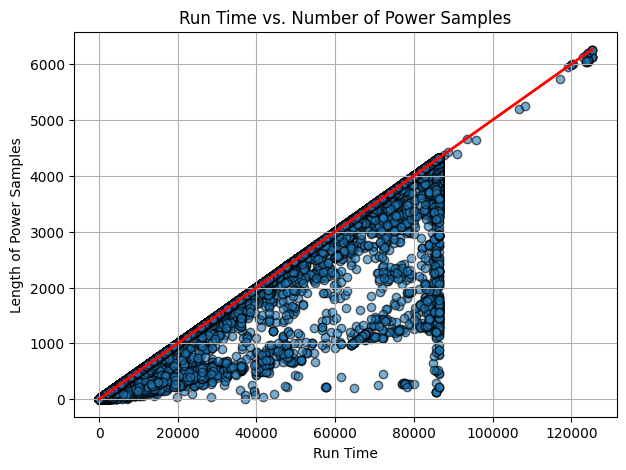

In [140]:
plt.figure(figsize=(7, 5))
plt.scatter(df["run_time"], df["len_power"], alpha=0.6, edgecolors="k")
# Compute ideal diagonal
x = np.linspace(0, df["run_time"].max(), 200)
y = x / 20.0   # ideal line for 20 s per sample

# Overlay the line
plt.plot(x, y, color="red", linewidth=2, label="run_time / len_power = 20")


plt.xlabel("Run Time")
plt.ylabel("Length of Power Samples")
plt.title("Run Time vs. Number of Power Samples")
plt.grid(True)
plt.show()


In [141]:
df["run_time"].describe()

,run_time
count,231238.000000
mean,5985.564393
std,16895.500685
min,0.000000
25%,13.000000
50%,203.000000
75%,2146.000000
max,125311.000000


In [142]:
df["len_power"].describe()

,len_power
count,231238.000000
mean,281.847296
std,803.487167
min,1.000000
25%,1.000000
50%,10.000000
75%,96.000000
max,6255.000000


In [143]:
# Explore entries that correspond to the vertical "boundary" line
mask = (df["run_time"]>80000) & (df["run_time"]<88000)
rows_filtered_df = df[mask]

print("Number of rows satisfy condition:", rows_filtered_df.shape[0])
rows_filtered_df["len_power"].describe()

Number of rows satisfy condition: 5497


,len_power
count,5497.000000
mean,3950.511006
std,743.432023
min,128.000000
25%,4054.000000
50%,4261.000000
75%,4299.000000
max,4366.000000


Those jobs have undersampled power_consumption data, far from the around 20 seconds sampling period.

In [144]:
mask = (df["run_time"]>=88000)
rows_filtered_df = df[mask]

print("Number of rows satisfy condition:", rows_filtered_df.shape[0])

Number of rows satisfy condition: 35


In [145]:
# For approx_t_per_power_sample, look for row with maximum value
row_max_df = df.loc[[df["approx_t_per_power_sample"].idxmax()]]
row_max_df

,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample
68355,"{859: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 856: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 858: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 857: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}","{859: 64, 856: 64, 858: 64, 857: 64}",4,0:0,2020-06-30 21:58:48+00:00,2020-07-01 08:17:53+00:00,25200,82259,COMPLETED,"[856, 857, 858, 859]",256,256,4,4,64.0,1,255067,1,None,0,37145,OK,2020-06-30 21:58:48+00:00,None,2020-06-30 11:40:41+00:00,NaN,1440,4,4,898,898,907,"[2760, 2730, 2770]","[216, 220, 216, 174, 150, 144, 182, 152, 178, 162, 156, 166, 174, 158, 166, 164, 164, 148, 172, 150, 160, 160, 168, 154, 162, 154, 158, 162, 144, 144, 152, 156, 148, 162, 144, 160, 144, 168, 154, 144, 162, 174, 158, 158, 144, 156, 148, 150, 176, 148, 160, 156, 154, 150, 156, 144, 174, 160, 174, 146, 168, 166, 144, 148, 156, 152, 162, 144, 152, 162, 160, 162, 162, 156, 160, 148, 148, 164, 152, 164, 160, 144, 144, 154, 156, 154, 176, 168, 150, 146, 164, 144, 152, 144, 154, 156, 156, 158, 166, 150, ...]","[696, 690, 700, 810, 760, 768, 788, 754, 752, 768, 772, 776, 776, 758, 762, 770, 770, 772, 790, 800, 768, 774, 764, 768, 760, 752, 766, 754, 768, 764, 762, 764, 778, 764, 770, 764, 764, 764, 762, 764, 692, 772, 756, 772, 762, 764, 762, 768, 764, 776, 770, 756, 762, 762, 776, 766, 778, 776, 758, 770, 766, 770, 764, 768, 766, 758, 770, 760, 762, 772, 768, 772, 762, 762, 776, 756, 766, 786, 754, 780, 762, 766, 766, 770, 768, 766, 772, 766, 768, 776, 760, 768, 768, 772, 768, 770, 780, 772, 772, 758, ...]",37145.0,True,4,3,1857,1857,12381.666667


In [146]:
# See if there are a lot of entries with different length (number of measures)  for each of the three power_consumptions
df["len_mem_power"] = df["mem_power_consumption"].apply(len)
df["len_cpu_power"] = df["cpu_power_consumption"].apply(len)

In [147]:
# Check differences
df["equal_stored_lengths"] = (
    (df["len_power"] == df["len_mem_power"]) &
    (df["len_power"] == df["len_cpu_power"])
)


# How many rows fail?
df["equal_stored_lengths"].value_counts()

,count
equal_stored_lengths,
True,204301
False,26937


In [148]:
cond=df["equal_stored_lengths"]==False
not_equal_df=df[cond]
cond_df=not_equal_df[["job_id", "n_nodes", "len_power", "len_mem_power", "len_cpu_power"]].copy()
cond_df["diff_node_mem"] = cond_df["len_power"] - cond_df["len_mem_power"]
cond_df["diff_node_mem"].describe()

,diff_node_mem
count,26937.000000
mean,-20.448974
std,308.782839
min,-4152.000000
25%,-3.000000
50%,1.000000
75%,7.000000
max,6062.000000


In [149]:
row_max_df = cond_df.loc[[cond_df["diff_node_mem"].idxmax()]]
row_max_df

,job_id,n_nodes,len_power,len_mem_power,len_cpu_power,diff_node_mem
151650,3621615,1,6062,0,0,6062


In [150]:
# Are there a lot of entries with any of the lengths equal to zero?
len_cols = ["len_power", "len_mem_power", "len_cpu_power"]
mask_zero = (df[len_cols] == 0).any(axis=1)
df_zero = df[mask_zero]

print("Rows with any zero length:", len(df_zero))
df_zero.head()

Rows with any zero length: 2867


,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample,equal_stored_lengths
19,"{332: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}",{332: 128},32,0:15,2020-05-22 14:31:20+00:00,2020-05-22 14:31:45+00:00,25200,5649414,COMPLETED,[332],128,128,1,1,4.0,1,92913,1,None,0,22,OK,2020-05-22 14:31:23+00:00,None,2020-05-22 14:31:20+00:00,NaN,60,4,4,237,237,771,[530],[],[],22.0,True,1,1,0,0,22.0,False
21,{208: [0]},{208: 4},4,0:0,2020-05-21 23:05:43+00:00,2020-05-22 05:17:47+00:00,25200,4854978,COMPLETED,[208],4,4,1,1,1.0,1,99470,1,[208],0,19,OK,2020-05-22 05:17:28+00:00,None,2020-05-21 23:05:43+00:00,NaN,10,0,0,240,240,284,[570],[],[],19.0,True,1,1,0,0,19.0,False
95,{363: [0]},{363: 4},4,0:15,2020-05-21 23:05:50+00:00,2020-05-22 14:24:56+00:00,25200,3577713,COMPLETED,[363],4,4,1,1,1.0,1,108249,1,[363],0,21,OK,2020-05-22 14:24:35+00:00,None,2020-05-21 23:05:50+00:00,NaN,10,0,0,240,240,284,[640],[],[],21.0,True,1,1,0,0,21.0,False
116,{112: [0]},{112: 4},1,0:0,2020-05-22 08:28:36+00:00,2020-05-22 09:38:24+00:00,25200,5503728,COMPLETED,[112],1,4,1,1,1.0,1,93950,1,[112],0,6,OK,2020-05-22 09:38:18+00:00,None,2020-05-22 08:28:36+00:00,NaN,10,4,4,1,7,284,[550],[],[],6.0,True,1,1,0,0,6.0,False
134,"{659: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}",{659: 128},32,0:15,2020-05-22 10:15:59+00:00,2020-05-22 10:16:03+00:00,25200,4906493,COMPLETED,[659],128,128,1,1,4.0,1,257524,1,None,0,3,OK,2020-05-22 10:16:00+00:00,None,2020-05-22 10:15:59+00:00,NaN,1440,4,4,237,237,8,[640],[],[],3.0,True,1,1,0,0,3.0,False


In [151]:
# Are len_mem and len_cpu always the same?
df["equal_mem_cpu_len"] = (df["len_mem_power"] == df["len_cpu_power"])

# How many rows fail?
df["equal_mem_cpu_len"].value_counts()

,count
equal_mem_cpu_len,
True,231222
False,16


In [152]:
cond=df["equal_mem_cpu_len"]==False
not_equal_mem_cpu_df=df[cond]
df_cond=not_equal_mem_cpu_df[["job_id", "n_nodes", "run_time", "len_power", "len_mem_power", "len_cpu_power"]].copy()
df_cond["diff_mem_cpu"] = df_cond["len_mem_power"] - df_cond["len_cpu_power"]
df_cond["diff_node_mem"] = df_cond["len_power"] - df_cond["len_mem_power"]
df_cond

,job_id,n_nodes,run_time,len_power,len_mem_power,len_cpu_power,diff_mem_cpu,diff_node_mem
7331,4866714,1,71354,3006,2975,2971,4,31
12591,5634041,1,17594,711,736,737,-1,-25
12692,5116045,1,71512,2974,2957,2956,1,17
12752,4863550,2,1818,88,60,59,1,28
12894,4838941,20,2096,105,102,101,1,3
13274,857614,1,276,11,7,8,-1,4
13331,752833,1,57782,2347,2335,2336,-1,12
131068,2620501,1,76169,3522,3522,3523,-1,0
131744,553199,1,80251,3726,3725,3726,-1,1
132283,2240689,1,79575,3693,3693,3694,-1,0


In [153]:
# We can consider len_mem_power and len_cpu_power basically equal for all entries

In [154]:
# Conclusion
# When three lengths are equal, choose len_power to calculate approx_t_per_power_sample
# When len_power is different to len_mem_power, and len_mem_power is not zero, take len_mem_power. If it is zero, take len_power.

def choose_length(row):
    # Case 1: lengths are equal → use len_power
    if row["len_power"] == row["len_mem_power"]:
        return row["len_power"]
    # Case 2: lengths differ
    else:
        if row["len_mem_power"] != 0:
            return row["len_mem_power"]
        else:
            return row["len_power"]

# Apply the logic
df["chosen_len"] = df.apply(choose_length, axis=1)

# Then compute approx_t_per_power_sample
df["new_approx_t_per_power_sample"] = np.where(
    df["chosen_len"] > 0,
    df["run_time"] / df["chosen_len"],
    np.nan
)


In [155]:
col = df["new_approx_t_per_power_sample"]

# Describe full column
print(col.describe())

count    231238.000000
mean         17.309408
std          19.527038
min           0.000000
25%          13.000000
50%          19.947368
75%          20.115385
max        2406.000000
Name: new_approx_t_per_power_sample, dtype: float64


Improvement in less affected by outliers, then lower std, and max, compared to the result without considering differences in power consumption length.

In [156]:
mask = df["approx_t_per_power_sample"] > 23
outliers_df = df[mask]

print("Number of outliers:", outliers_df.shape[0])


Number of outliers: 15110


In [157]:
# See how many of those have one node
mask_2 = (df["approx_t_per_power_sample"] > 25) & (df["n_nodes"] == 1)
outliers2_df = df[mask_2]

print("Number of outliers:", outliers2_df.shape[0])


Number of outliers: 7370


In [158]:
# Outliers for new_approx_t_per_power_sample, considering its own std.
mask = df["new_approx_t_per_power_sample"] > 37
outliers_df = df[mask]

print("Number of outliers:", outliers_df.shape[0])


Number of outliers: 4759


In [159]:
# outliers_df.head()

In [160]:
# outliers2_df.drop(columns=['cores_alloc_layout', 'cores_allocated']).head()

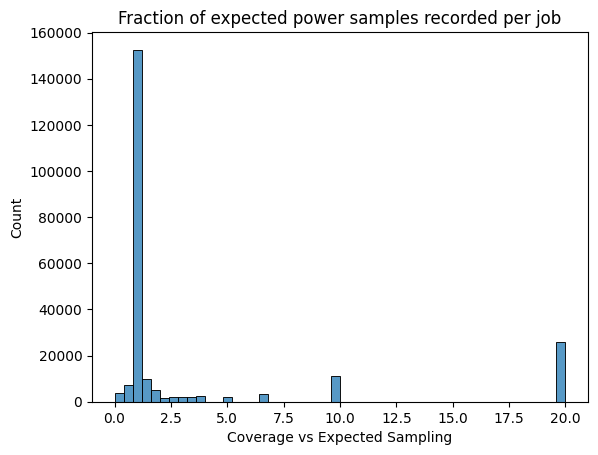

In [161]:
df["coverage_ratio"] = df["len_power"] / (df["run_time"] / 20)  # if 20 s is nominal interval
sns.histplot(df["coverage_ratio"], bins=50)
plt.xlabel("Coverage vs Expected Sampling")
plt.title("Fraction of expected power samples recorded per job")
plt.show()

In [162]:
# Find the outliers in coverage ratio
mask = df["coverage_ratio"] > 18
outliers_df = df[mask]
print("Number of outliers:", outliers_df.shape[0])
outliers_df.head(2)


Number of outliers: 25821


,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample,equal_stored_lengths,equal_mem_cpu_len,chosen_len,new_approx_t_per_power_sample,coverage_ratio
505,"{85: [0, 1, 2, 3, 4, 5, 6, 7]}",{85: 32},4,0:0,2020-05-22 02:56:32+00:00,2020-05-22 02:57:01+00:00,25200,4089922,FAILED,[85],32,32,1,1,8.0,1,81987,1,None,0,1,OK,2020-05-22 02:57:00+00:00,NonZeroExitCode,2020-05-22 02:56:32+00:00,NaN,1200,4,4,24,24,1441,[520],[36],[44],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0
1642,"{85: [0, 1, 2, 3, 4, 5, 6, 7]}",{85: 32},4,0:0,2020-05-22 02:43:40+00:00,2020-05-22 02:44:01+00:00,25200,4979168,FAILED,[85],32,32,1,1,8.0,1,82037,1,None,0,1,OK,2020-05-22 02:44:00+00:00,NonZeroExitCode,2020-05-22 02:43:40+00:00,NaN,1200,4,4,24,24,1441,[520],[36],[48],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0


In [163]:
df_run1 = df[df["run_time"] == 1]
print("Number of jobs with run_time = 1s:", df_run1.shape[0])
df_run1.head(2)

Number of jobs with run_time = 1s: 25755


,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample,equal_stored_lengths,equal_mem_cpu_len,chosen_len,new_approx_t_per_power_sample,coverage_ratio
505,"{85: [0, 1, 2, 3, 4, 5, 6, 7]}",{85: 32},4,0:0,2020-05-22 02:56:32+00:00,2020-05-22 02:57:01+00:00,25200,4089922,FAILED,[85],32,32,1,1,8.0,1,81987,1,None,0,1,OK,2020-05-22 02:57:00+00:00,NonZeroExitCode,2020-05-22 02:56:32+00:00,NaN,1200,4,4,24,24,1441,[520],[36],[44],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0
1642,"{85: [0, 1, 2, 3, 4, 5, 6, 7]}",{85: 32},4,0:0,2020-05-22 02:43:40+00:00,2020-05-22 02:44:01+00:00,25200,4979168,FAILED,[85],32,32,1,1,8.0,1,82037,1,None,0,1,OK,2020-05-22 02:44:00+00:00,NonZeroExitCode,2020-05-22 02:43:40+00:00,NaN,1200,4,4,24,24,1441,[520],[36],[48],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0


In [164]:
# Calculate expected samples and coverage vs expected
interval = 20  # seconds
rt = pd.to_numeric(df["run_time"], errors="coerce")
lp = pd.to_numeric(df["len_power"], errors="coerce")

# Expected samples: at least 1 even if run_time < interval
expected = np.clip(np.ceil(rt / interval), 1, None)

coverage = lp / expected
df["expected_samples_20s"] = expected
df["coverage_vs_expected"] = coverage


In [165]:
short_one = df[(rt == 1) & (lp == 1)]
print("Count:", len(short_one))
print("Share of all rows: {:.2%}".format(len(short_one) / len(df)))
short_one.head()
# All entries with run_time = 1s have len_power = 1, that is, one power sample only.

Count: 25755
Share of all rows: 11.14%


,cores_alloc_layout,cores_allocated,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample,equal_stored_lengths,equal_mem_cpu_len,chosen_len,new_approx_t_per_power_sample,coverage_ratio,expected_samples_20s,coverage_vs_expected
505,"{85: [0, 1, 2, 3, 4, 5, 6, 7]}",{85: 32},4,0:0,2020-05-22 02:56:32+00:00,2020-05-22 02:57:01+00:00,25200,4089922,FAILED,[85],32,32,1,1,8.0,1,81987,1,None,0,1,OK,2020-05-22 02:57:00+00:00,NonZeroExitCode,2020-05-22 02:56:32+00:00,NaN,1200,4,4,24,24,1441,[520],[36],[44],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0,1.0,1.0
1642,"{85: [0, 1, 2, 3, 4, 5, 6, 7]}",{85: 32},4,0:0,2020-05-22 02:43:40+00:00,2020-05-22 02:44:01+00:00,25200,4979168,FAILED,[85],32,32,1,1,8.0,1,82037,1,None,0,1,OK,2020-05-22 02:44:00+00:00,NonZeroExitCode,2020-05-22 02:43:40+00:00,NaN,1200,4,4,24,24,1441,[520],[36],[48],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0,1.0,1.0
2232,{977: [0]},{977: 4},1,1:9,2020-05-23 22:42:20+00:00,2020-05-23 22:42:21+00:00,25200,2228504,FAILED,[977],1,4,1,1,0.0,1,319590,1,None,0,1,OK,2020-05-23 22:42:20+00:00,NonZeroExitCode,2020-05-23 22:42:20+00:00,NaN,30,2,2,1,7,379,[560],[38],[82],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0,1.0,1.0
7210,"{297: [0, 1, 2, 3, 4, 5, 6, 7]}",{297: 32},32,1:0,2020-05-28 07:00:00+00:00,2020-05-28 07:00:01+00:00,25200,85230,FAILED,[297],32,32,1,1,0.0,1,258485,1,None,0,1,OK,2020-05-28 07:00:00+00:00,NonZeroExitCode,2020-05-28 07:00:00+00:00,NaN,120,4,4,59,59,571,[850],[36],[78],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0,1.0,1.0
7281,"{457: [0, 1]}",{457: 8},4,0:0,2020-05-28 09:14:39+00:00,2020-05-28 09:14:41+00:00,25200,2807594,FAILED,[457],8,8,1,1,2.0,1,120697,1,None,0,1,OK,2020-05-28 09:14:40+00:00,NonZeroExitCode,2020-05-28 09:14:39+00:00,NaN,60,4,4,224,224,1481,[540],[40],[82],1.0,True,1,1,1,1,1.0,True,True,1,1.0,20.0,1.0,1.0


In [166]:
# print(df.shape[0])

In [167]:
df.drop(columns=["cores_alloc_layout", "cores_allocated"]).head(1)

,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample,equal_stored_lengths,equal_mem_cpu_len,chosen_len,new_approx_t_per_power_sample,coverage_ratio,expected_samples_20s,coverage_vs_expected
0,4,1:0,2020-05-31 22:09:29+00:00,2020-05-31 22:21:33+00:00,25200,2913594,CANCELLED,"[900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915]",256,2048,16,16,64.0,1,330603,1,None,0,723,0,2020-05-31 22:09:30+00:00,None,2020-05-31 22:09:29+00:00,NaN,270,64,64,475,3800,310,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]",723.0,True,16,36,36,36,20.083333,True,True,36,20.083333,0.995851,37.0,0.972973


In [168]:
# Could be a sampling period of around 20 seconds.
# Look first into the endpoint convention
# Add the following cols to the DS
# Calculate the length of the node_power_consumption column

df["len_power"] = df["node_power_consumption"].apply(len).astype("int")

# Calculate the job duration in seconds
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

# Check the possible sample intervals
#    dt1: assume [start, end)  -> duration / L
#    dt2: assume [start, end]  -> duration / (L-1)
df["dt1"] = np.where(df["len_power"] > 0,  df["duration"] / df["len_power"],      np.nan)
df["dt2"] = np.where(df["len_power"] > 1,  df["duration"] / (df["len_power"] - 1), np.nan)

# Calculate the averages (skip NaNs)
avg_dt1 = df["dt1"].mean(skipna=True)
avg_dt2 = df["dt2"].mean(skipna=True)
print({"avg_dt1_exclude_end": avg_dt1, "avg_dt2_include_end": avg_dt2})

# Medians and quick sanity view
med_dt1 = df["dt1"].median(skipna=True)
med_dt2 = df["dt2"].median(skipna=True)
print({"median_dt1": med_dt1, "median_dt2": med_dt2})

# Which convention fits better overall?
closer = "include_end" if abs(avg_dt2-20) < abs(avg_dt1-20) else "exclude_end"
print({"closer_to_20s_by_mean": closer})



{'avg_dt1_exclude_end': np.float64(17.52385547995984), 'avg_dt2_include_end': np.float64(25.58293257849779)}
{'median_dt1': 19.944751381215468, 'median_dt2': 20.7}
{'closer_to_20s_by_mean': 'exclude_end'}


In [169]:
df.drop(columns=["cores_alloc_layout", "cores_allocated"]).head()

,cores_per_task,derived_ec,eligible_time,end_time,group_id,job_id,job_state,nodes,num_cores_req,num_cores_alloc,num_nodes_req,num_nodes_alloc,num_tasks,partition,priority,qos,req_nodes,req_switch,run_time,shared,start_time,state_reason,submit_time,threads_per_core,time_limit,num_gpus_req,num_gpus_alloc,mem_req,mem_alloc,user_id,node_power_consumption,mem_power_consumption,cpu_power_consumption,duration,runtime_check,n_nodes,len_power,len_mem_power,len_cpu_power,approx_t_per_power_sample,equal_stored_lengths,equal_mem_cpu_len,chosen_len,new_approx_t_per_power_sample,coverage_ratio,expected_samples_20s,coverage_vs_expected,dt1,dt2
0,4,1:0,2020-05-31 22:09:29+00:00,2020-05-31 22:21:33+00:00,25200,2913594,CANCELLED,"[900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915]",256,2048,16,16,64.0,1,330603,1,None,0,723,0,2020-05-31 22:09:30+00:00,None,2020-05-31 22:09:29+00:00,NaN,270,64,64,475,3800,310,"[7970, 8450, 8460, 8470, 7440, 8470, 8460, 8470, 7910, 8480, 7920, 8430, 7940, 8440, 8480, 8490, 7960, 8470, 8460, 8470, 8460, 8460, 7920, 8460, 7960, 8440, 7930, 8480, 8500, 8460, 8470, 8470, 8450, 8500, 8440, 8440]","[418, 724, 724, 678, 556, 654, 606, 600, 600, 488, 606, 446, 592, 566, 602, 560, 594, 610, 590, 596, 602, 530, 596, 592, 638, 574, 590, 594, 652, 440, 594, 558, 662, 592, 590, 582]","[948, 1628, 1650, 1544, 1260, 1532, 1418, 1700, 1710, 1396, 1676, 1302, 1710, 1360, 1692, 1612, 1714, 1456, 1706, 1722, 1670, 1224, 1728, 1708, 1520, 1550, 1698, 1706, 1510, 1294, 1694, 1596, 1496, 1688, 1684, 1314]",723.0,True,16,36,36,36,20.083333,True,True,36,20.083333,0.995851,37.0,0.972973,20.083333,20.657143
1,4,1:0,2020-05-31 22:22:08+00:00,2020-05-31 22:41:25+00:00,25200,4063066,CANCELLED,"[680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695]",256,2048,16,16,64.0,1,81394,1,None,0,1157,0,2020-05-31 22:22:08+00:00,None,2020-05-31 22:22:08+00:00,NaN,270,64,64,475,3800,310,"[7970, 8430, 7940, 8480, 7460, 8490, 6890, 8480, 8480, 8510, 8490, 8500, 8470, 7930, 8530, 7430, 8490, 8480, 8470, 6370, 8440, 7970, 8470, 7440, 8460, 7950, 8470, 8460, 8510, 7930, 8480, 7440, 8420, 8460, 8460, 8470, 8450, 8460, 8450, 8460, 8460, 8480, 8480, 8470, 6890, 8460, 5820, 8470, 8490, 8450, 7410, 8470, 7950, 8460, 7440, 8490, 8480, 8450]","[720, 738, 736, 614, 720, 642, 632, 524, 598, 628, 616, 550, 586, 652, 594, 590, 596, 452, 586, 596, 628, 608, 594, 556, 650, 560, 594, 478, 650, 588, 592, 598, 656, 486, 592, 442, 602, 556, 596, 612, 592, 594, 588, 602, 590, 586, 614, 530, 590, 298, 642, 592, 594, 590, 652, 596, 594, 580]","[1640, 1604, 1592, 1364, 1532, 1508, 1528, 1476, 1674, 1556, 1600, 1572, 1686, 1504, 1676, 1696, 1684, 1082, 1698, 1686, 1584, 1424, 1686, 1584, 1504, 1564, 1684, 1380, 1544, 1674, 1686, 1690, 1504, 1368, 1678, 1240, 1656, 1580, 1680, 1418, 1682, 1678, 1688, 1404, 1698, 1686, 1552, 1214, 1694, 872, 1514, 1696, 1688, 1690, 1518, 1712, 1686, 1118]",1157.0,True,16,58,58,58,19.948276,True,True,58,19.948276,1.002593,58.0,1.000000,19.948276,20.298246
2,4,1:0,2020-05-31 22:41:38+00:00,2020-05-31 22:56:20+00:00,25200,5730196,CANCELLED,"[680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695]",256,2048,16,16,64.0,1,80615,1,None,0,881,0,2020-05-31 22:41:39+00:00,None,2020-05-31 22:41:38+00:00,NaN,270,64,64,475,3800,310,"[7950, 7970, 8500, 8480, 8470, 6900, 8460, 8450, 8470, 5860, 8490, 7950, 8470, 7940, 8480, 8470, 8470, 8460, 8450, 7910, 8510, 7960, 8510, 7920, 8490, 7910, 8470, 8450, 8480, 8460, 8470, 5800, 8460, 8470, 8510, 7950, 8480, 7960, 8470, 8490, 8480, 8470, 7980, 8490, 8450]","[672, 720, 716, 630, 674, 474, 644, 606, 602, 564, 650, 592, 594, 594, 644, 590, 594, 632, 588, 514, 590, 650, 564, 594, 560, 648, 592, 590, 542, 592, 590, 592, 592, 592, 596, 598, 646, 590, 554, 640, 366, 594, 598, 642, 584]","[1654, 1600, 1606, 1438, 1506, 1108, 1496, 1670, 1680, 1580, 1514, 1686, 1684, 1694, 1554, 1680, 1700, 1526, 1668, 1486, 1690, 1512, 1590, 1692, 1586, 1504, 1682, 1

In [170]:

def decide_row(row, list_col="node_power_consumption", dt_nom=20.0, tol=1.0):
    L = len(row[list_col])
    if L <= 1:
        return np.nan
    dur = (row["end_time"] - row["start_time"]).total_seconds()
    err_excl = abs(dur - L    * dt_nom)   # [start, end)
    err_incl = abs(dur - (L-1)* dt_nom)   # [start, end]
    return "include_end" if err_incl < err_excl else "exclude_end"

votes = df.apply(decide_row, axis=1)
votes.value_counts(dropna=True)      # pick the majority


,count
exclude_end,138389
include_end,20278


## 2.3. Correlation

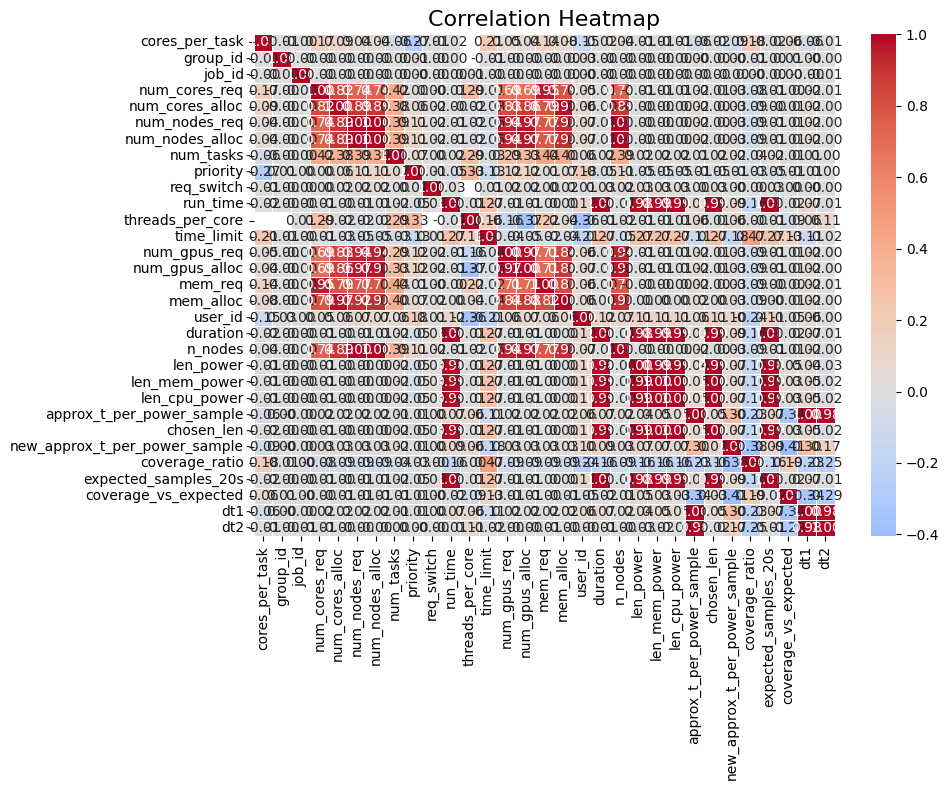

In [171]:
# Calculate the correlation matrix
numerical_features = df.select_dtypes(include=[np.number])
corr_matrix = numerical_features.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    cmap='coolwarm',   # color palette
    fmt=".2f",         # format to 2 decimal places
    linewidths=0.5,     # thin lines between cells
    center = 0
)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Display the heatmap
plt.tight_layout()
plt.show()

#Print strongest correlations with node power consumption (NODE_POWER_CONSUMPTION IS A LIST, NEEDS FIX)
#print("\nCorrelations with Node Power Consumption:")
#correlations = corr_matrix['node_power_consumption'].sort_values(ascending=False)
#print(correlations)

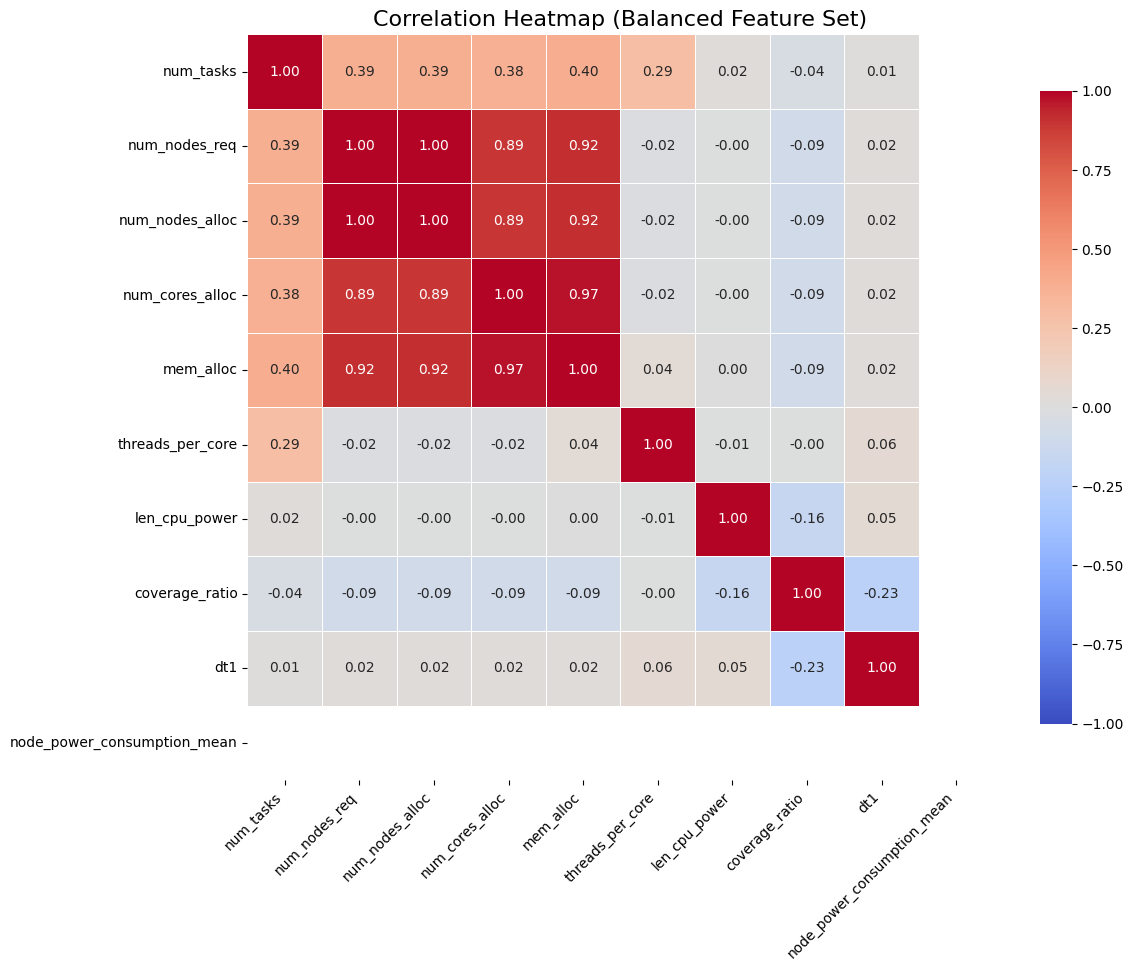

In [179]:
# For node_power_consumption, calculate the mean of each list
# Handle cases where the list might be empty or contain non-numeric data
df["node_power_consumption_mean"] = df["node_power_consumption"].apply(
    lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan
)

selected_features = [
    "num_tasks",
    "num_nodes_req",
    "num_nodes_alloc",
    "num_cores_alloc",
    "mem_alloc",
    "threads_per_core",
    "len_cpu_power",
    "coverage_ratio",
    "dt1",
    "node_power_consumption_mean" # Use the new scalar column
]

df_selected = df[selected_features].copy()
corr_matrix = df_selected.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap (Reduced Feature Set)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()